# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
print(adver_data.mean(),adver_data.std(),adver_data.median() )

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64 TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64 TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64


In [5]:
import seaborn as sns
sns.pairplot(adver_data)

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [6]:
X = adver_data[['TV','Radio','Newspaper']].values
y = adver_data['Sales'].values
print(X)
print(y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [7]:
means, stds = [X[::,i].mean() for i in range(X.shape[1])], [X[::,i].std() for i in range(X.shape[1])]
print(means,stds)

[147.0425, 23.264000000000006, 30.553999999999995] [85.63933175679269, 14.809645640595186, 21.724106057557353]


In [8]:
import numpy as np
X = np.array([[(X[j,i] - means[i])/stds[i] for i in range(X.shape[1])] for j in range(X.shape[0])])
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [9]:
X = np.hstack((np.ones(X.shape[0]).reshape(200,1),X))
print(X)

[[ 1.00000000e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [ 1.00000000e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [ 1.00000000e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 1.00000000e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 1.00000000e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [ 1.00000000e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [ 1.00000000e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [ 1.00000000e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [ 1.00000000e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 1.00000000e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [ 1.00000000e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 1.00000000e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [ 1.00000000e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [ 1.00000000e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 1.00000000e+00  6.66253447e-01  6.50657027e-01  7.11007392e

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [10]:
def mserror(y, y_pred):
    y = y.values.reshape(y.shape[0])
    y_pred = y_pred.values.reshape(y_pred.shape[0])
    error = np.sum((y_pred - y) * (y_pred - y))/(y.shape[0])
    return (error)

In [11]:
y_median = np.array([adver_data['Sales'].median() for i in range(adver_data.shape[0])])
y_median = pd.DataFrame({'median': y_median})
answer1 = mserror(adver_data['Sales'],y_median)
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [12]:
def normal_equation(X, y):
    return (np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y))

In [13]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [14]:
answer2 = np.sum(norm_eq_weights*np.array([0,0,0,1]))
print(answer2)
write_answer_to_file(answer2, '2.txt')

-0.02253860888873299


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [15]:
def linear_prediction(X, w):
    return (np.dot(X,w))

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [16]:
y_pred_norm = np.array([linear_prediction(X[i,::],norm_eq_weights) for i in range(X.shape[0])])
y_pred_norm = pd.DataFrame(y_pred_norm)
answer3 = mserror(adver_data['Sales'],y_pred_norm)
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [17]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = (linear_prediction(X[train_ind,::],w)-y[train_ind])
    grad1 = X[train_ind,1]*(linear_prediction(X[train_ind,::],w)-y[train_ind])
    grad2 = X[train_ind,2]*(linear_prediction(X[train_ind,::],w)-y[train_ind])
    grad3 = X[train_ind,3]*(linear_prediction(X[train_ind,::],w)-y[train_ind])
    return  (w - 2* eta * np.array([grad0, grad1, grad2, grad3])/200)

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [18]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = np.array([])
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        
        w1 = stochastic_gradient_step(X,y,w,random_ind,eta)
        errors = np.append(errors,mserror(pd.Series(y),pd.Series(linear_prediction(X,w1))))
        iter_num+=1
        weight_dist = np.linalg.norm(w1-w)
        print (weight_dist)
        w = w1
        

        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [19]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0,0,0,0]), eta=0.01, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False)

0.0030992721472770197
0.0018703459939071931
0.0038176491298335443
0.0029255613184442615
0.0013886068686431569
0.0015471752822156632
0.0037464431826602636
0.003057345835957243
0.003094092079670399
0.0014153271489283003
0.00254944500931488
0.003506464625552838
0.001455301482053109
0.0030095709063600834
0.001933119373932289
0.0019365247025724896
0.0003967505822283485
0.001648003262218349
0.0041485926298626425
0.00209022549506603
0.0035008112731250607
0.0018265386581112553
0.003380844704366368
0.0016630412220493913
0.0018976836602081753
0.0022663706144669315
0.0030515898777800777
0.0015798834383070623
0.001615069796462069
0.0024041990907807662
0.0029812830912007045
0.0025205265027903483
0.0052147667826047805
0.0035188140964656366
0.0022640709169666554
0.0029159303206268096
0.001323406115408494
0.00132288699199358
0.002352264288721716
0.001322151013107337
0.0020501852620516117
0.0017228970115374075
0.0037220335825420008
0.002202983062835098
0.00038969517795418217
0.0020487385796834007
0.002

0.0013759156904130632
0.002385046614499071
0.0028995603927779385
0.0019594161341647894
0.002200417874891275
0.004273633403636246
0.0023423485916982817
0.001288930133039834
0.004715437888915938
0.0015886714052600864
0.0015538035045568784
0.0015535698251909552
0.0028958238000592203
0.0023961553711904344
0.0017927388084016669
0.003340497775948734
0.004063031588177151
0.002790682207109742
0.004633543539597139
0.002169890149157294
0.0022570886837826186
0.0017606522442975975
0.003971144548516818
0.0028822947879045637
0.00167759710289063
0.0022914830418473103
0.002922506803881725
0.0016580811197761905
0.002167130995263367
0.0012652322145144334
0.002201883850882041
0.005563622842739472
0.0015549638123919327
0.006079776966949777
0.0035551311227496212
0.0020846012364452464
0.0019886406879460936
0.0016399877354749428
0.00218918308626035
0.002347124638649498
0.0022345334611198124
0.004156798355168943
0.0017491369535803586
0.0026064255540064617
0.001477337441427011
0.0012070602613445814
0.002331220

0.001192029766673824
0.008525561369964513
0.0024635925959505646
0.001942747174352643
0.0010766138146013388
0.003843840447228707
0.0018529221133254741
0.0013904185967118122
0.0014322983545501764
0.003689325697685794
0.0017560167368857221
0.003641898700048299
0.005012457432496244
0.0018734493695907143
0.0013495247491405028
0.0034634795784764943
0.001243367216408459
0.0012469006574423558
0.0022840464422363236
0.0013234194124969803
0.0035197388080786983
0.0015731149787781829
0.0016660378085541021
0.0014414481033607324
0.0014943239159469317
0.0027220471401621306
0.0021002322990911434
0.0019682313134810987
0.0018926333737723092
0.002452840467858183
0.002167340962661526
0.0014487104005949884
0.0028295899249611385
0.0012409470966158525
0.004469667568959358
0.0011856494832109647
0.0009650274532550412
0.0014279300375801027
0.0036574045274477196
0.0015032557242785486
0.002879557225204181
0.0036810372174298843
0.004400004469276502
0.0018699591800174402
0.002339134181760629
0.002426410559796053
0.0

0.002385245529222568
0.0017141783061554246
0.002687254731439347
0.0013602521399530994
0.002662639774523297
0.0018047358934884688
0.0011367600353305468
0.0011098596465785422
0.00571204346895709
0.0013894656172984048
0.0012636338306927515
0.0038697250572017664
0.0015161733800833133
0.0039200368391055255
0.0012133381799419422
0.0018784390234565759
0.0017769319239855914
0.002684972429026658
0.0032240852578126365
0.0017488521172552127
0.0014261898113934227
0.0027420230452537566
0.0048045736588651616
0.0013801688361711744
0.002025876133702273
0.0020801459158216475
0.003230300759729418
0.003510729708205194
0.0027894151119021047
0.0018690794740431537
0.000897263048682415
0.004799014104969797
0.0021431573772700903
0.0018678035868133856
0.003295379212986734
0.0026311250946105
0.001906243696468967
0.0026938818569513558
0.002076870794933533
0.0020265315466667876
0.0036952521949908004
0.001874686620560662
0.0016535637970255027
0.0008960466367568724
0.0012853785090501935
0.002614292636034193
0.00265

0.001075690515880585
0.0015494399356970356
0.0017456571640360795
0.001796242880935392
0.0011599866419741323
0.005499825566811073
0.001960372772160049
0.005921093051043404
0.0011679612547775707
0.0017937922500013519
0.001412460524119126
0.0025889426787472367
0.0020689865249471913
0.0016576052674373762
0.002947622063748691
0.0015351962738404214
0.00395915036871097
0.0015418401320279518
0.005489411797276405
0.001531677042595292
0.0013202118973111346
0.002001179833916421
0.001968135353953756
0.0013788774285661226
0.006677543402914803
0.0020447731248088258
0.0013200460460321731
0.002943837700293239
0.001386596382368811
0.004900535088438132
0.0014474292452943444
0.0019554526835380563
0.00602384290893031
0.0018096651156020095
0.0031743997852980528
0.004468913335597815
0.001340088605257813
0.005161768313307921
0.0031831696626378565
0.0020410851544973283
0.004098888022773557
0.001235708472982954
0.0033603661744253366
0.0014746759262558105
0.001215185283869971
0.0008381420231679243
0.00252849790

0.0021068942624692696
0.00342668540331721
0.002590678956477238
0.0011897345046365925
0.0014807310126134616
0.00174130812645176
0.000869200285275132
0.0018250857059870999
0.0025890076120189793
0.0014768214834993104
0.0013197087372243247
0.00275572022713444
0.0024010472716073784
0.0036904239128809327
0.003901789044090502
0.002528542260352762
1.7059137704563783e-05
0.004819073686402061
0.0029571705813215138
0.0024224982666769053
0.002469968268108976
0.005149983816012508
0.001989136701006519
0.0015355773444893379
0.0024181866870956257
0.0014833456936362492
0.0017987770030242951
0.0014914191738249396
0.0015701392636741946
0.0015679652185859826
0.0016018844692803184
0.0032687849408227386
0.005275109668229577
0.002664562243665278
0.002706662545489009
0.0015977921178588258
0.004658425773938233
0.0024691199546143126
0.003881437354636589
0.0021170456554060013
0.0015706139879445031
0.0021516389717669763
0.0013926979211161031
0.0034657788322658514
0.0012690371629900062
0.0018680322208209684
0.0023

0.00149209943861539
0.0016498671551466544
0.001854856257494365
0.002385357067856483
0.0013520655745118575
0.001784429482206102
0.0017920441817698548
0.0014290943696370507
0.0016159867127046638
0.0010932446979049783
0.0018405231406688027
0.0014883512587495146
0.0020288224218472017
0.001259843660454594
0.0016892937580041832
0.0015511820328549665
0.003711010320528036
0.0012888955100378752
0.0018460027138004608
0.0022673978051483894
0.0033445521697993853
0.0013490716811628417
0.001426921995892204
0.0015224529357969567
0.006875857347882701
0.001755254207344582
0.0014202835044164047
0.0012595832340031228
0.001743432558714962
0.0014870203426549428
0.0013243162519455819
0.0015490808004461924
0.003552020581663285
0.002320078626352767
0.0016308124740082013
0.0014033221264185553
0.0033871089471831134
0.0013050325732880876
0.002898656354223739
0.003370819648345753
0.0010954802018539852
0.0014288534820981879
0.0015152813241429424
0.002897409695125298
0.0013738546574959035
0.002429536770161884
0.001

0.0019605135482394656
0.0017600925069795976
0.0017740097473339272
0.002986624862964619
0.001254616390038601
0.0014594214752857854
0.0010561995679141106
0.001781540832276965
0.0011991719476634403
0.001227797024424645
0.0010861736286749998
0.00098423186125433
0.0022194638200855763
0.0015246757953086432
0.0013047685239430053
0.00524627676427988
0.0011027439420452703
0.004273764147835852
0.0013045510549929806
0.001886795937429851
0.0013038219162750553
0.0015990360396885407
0.0017710761830304804
0.0016551940350654408
0.0018854331020873366
0.0012432004569754064
0.0006358620928693406
0.001650150403623744
0.0011137109659206446
0.0011707893656479431
0.0011651514695136147
0.0017410400328647282
0.0027741143531366664
0.004584043217803714
0.001241979344954361
0.002273112682770288
0.001740909356073731
0.0012415150386467406
0.0014415753184827196
0.001766346046480634
0.0018978876665866876
0.00213440939424725
0.0015368361331017885
0.002667551742430486
0.0013062431177297783
0.0024505530942064003
0.00139

0.0013426604907580157
0.0030436473988049487
0.003394827842377576
0.0028716082476542277
0.0020564805143675393
0.002089907080175472
0.0008828074446195066
0.0007819198770215896
0.0012544447977007223
0.003642387081430817
0.004136419789327417
0.0018138342517534265
0.005048677175596318
0.0012895761073511386
0.0022375459029742814
0.0016109700443949382
0.0011947979842033708
0.0016455590942581722
0.0011440027390260373
0.0016464523045967973
0.0023558339096324972
0.003410892103421056
0.0011956584058105462
0.0014874307343060887
0.002208902796352146
0.0012955074590979064
0.0011188856302128687
0.0025222542397642447
0.001459347236181736
0.0015031928041128477
0.0016063018930546472
0.002185465119214157
0.0013623540272559203
0.0010521815625492627
0.0013039788591431103
0.001550982453433346
0.0014916731614106516
0.0016100846838104223
0.0014287904851244368
0.0016087248399642938
0.001416756325857361
0.0011906691757037563
0.002064593640510013
0.003030554593968831
0.001848840103809254
0.0016344733300639749
0.

0.002536205880391959
0.001087121636368388
0.001474761749033739
0.003324171459655301
0.003103695366919157
0.0015050861677795547
0.0015829100599328353
0.0011108457616165954
0.002014623690663463
0.0028803814728725384
0.0019929391089966754
0.001337768928343595
0.0015543147033101998
0.005406838600651893
0.0011005137431231546
0.0005166820559129335
0.0011481597769575596
0.0011941833395171476
0.0012082641756105343
0.0016754469505739426
0.001312229103891924
0.0015334062854177998
0.0017353603097153031
0.0016492735509356265
0.0010993372173096834
0.0016469491437730445
0.0014723582077999936
0.0021014804681377722
0.0019009484096421266
0.0011928695685667627
0.004569516922491461
0.0036935909667606894
0.0020907412005032387
0.004565100772093107
0.0012805000086777976
0.0018111922574865224
0.000768281916891951
0.0015636555882596467
0.0015176877793770583
0.0006967911377858766
0.0036902874007197126
0.0022038980078858553
0.0015513143768604058
0.0028695250243120523
0.0016414104541845834
0.0013162355677095352


0.0011252232602417481
0.0012570826019209186
0.00039389731081836664
0.0028604957903166834
0.0018944490266976411
0.003342673077643408
0.001412486659295324
0.004190735411345692
0.003163445884735582
0.0051507856826389
0.0015333124270563005
0.001203682545756835
0.0023051841867395466
0.0009135782082057345
0.0012704961392543499
0.0010396223044980763
0.001314112849659671
0.001865634181634532
0.00389181864563572
0.0011747135192837006
0.002454442378800102
0.0056596725837566655
0.0015377911272312517
0.0019428636857220364
0.00204627910434559
0.0024123617714614733
0.0012356039681935935
0.001882698505773752
0.0019646111233300886
0.003517742887745284
0.0030445772980356996
0.0011955042784588341
0.002734744247394057
0.0009600707979219892
0.003258451621072521
0.0011709864513573282
0.002777199931629582
0.0014132827335068658
0.001274807071585009
0.0012516654047478178
0.0028219994055895224
0.0012744224464264632
0.0016684581612787846
0.0036926687328986295
0.0020088289720449973
0.0010624335146879862
0.001039

0.0019979553788514225
0.0010227791725804431
0.001294250512781827
0.0009910896750193493
0.0016149658835145216
0.0017614930550965155
0.0014969228834004367
0.0011878992115065127
0.0010695004527074817
0.0014521125996376928
0.0025289419745664343
0.0020687383697057748
0.003095721714200041
0.004438722939301341
0.0023537201224242154
0.002298184110834526
0.0012537396484666576
0.0010200168971839366
0.00196122691278356
0.0035923432872295795
0.0010395178660066774
0.0009763019530859212
0.001590745548319022
0.0031681306660856275
0.0012812523192311186
0.003509197492600211
0.0030093357425864174
0.002770573001893917
0.0012795635065729327
0.0019475444735920265
0.0005169383839081109
0.0011274284954414379
0.002030593383834909
0.0011488130786964884
0.0014456213748431296
0.0012097860614843096
0.0012492162666441623
0.0005042083310250501
0.005320813287317399
0.0019160117015617213
0.0007718478579839948
0.0014306133094483936
0.0012202146528527621
0.001309422235832468
0.0009557173339666936
0.0019348375706812557


0.0013931536774141465
0.00121014291241369
0.0008448794188817361
0.0009368379543822076
0.0020248329583282335
0.001323889939654574
0.0014034185945119367
0.002215251722841665
0.001141383202985283
0.0007306269049081647
0.0015124570024364183
0.0017140082558553867
0.001061231057434696
0.0006121561067123543
0.0011001868531530427
0.0016923847956414656
0.003208800184944867
0.0016878075295946695
0.0011402237380260655
0.0010036742918405309
0.0009244140596732531
0.0018297239503389804
0.0013975145792076303
0.0014248296577597315
0.002178858422130867
0.0008785267903362281
0.0018138095445267475
0.0011498565295714515
0.0010022367065907404
0.0012349410441247907
0.0021524516837048116
0.001188638966216054
0.0026958480418107366
0.0009651156231880377
0.003695068470150437
0.0009649889650856148
0.002392653836522556
0.0009274404290443957
0.0022542254976928196
0.003199344670621627
0.0029243845705668107
0.0018754295126710246
0.002183545084408443
0.0014551584177882478
0.0010011933468829343
0.0015794440118448228
0

0.003331772044985302
0.0012559336981590149
0.0011001596951407762
0.0015398373655519956
0.0012688750742628162
0.0017952099569288925
0.002084440504522424
0.002477981859736838
0.0015946264182251277
0.0010858823653701498
0.001401839679264918
0.0012026090434392692
0.0012678001193896756
0.0012129640056752105
0.0006343915776470768
0.001237563242279833
0.002102629832670971
0.0038618825440297298
0.0034292421708324327
0.0010601389289544906
0.0047233467208326885
0.0020251333688165933
0.001293963525019755
0.0008434955542488423
0.0030476570367112986
0.00093117586334743
0.000869230085030739
0.001097363228342406
0.0012984605615926628
0.0010230535690246936
0.0009353201950821515
0.0010240131771948869
0.0011251013318949133
0.0008140567983988228
0.0007006132896821021
0.0019264990774800325
0.001191904674838629
0.0013981321563143112
0.001315379019073899
0.0012660279230590362
0.0018967131956517955
0.0025565410744858635
0.0010693701905389195
0.0006317811582018886
0.0031376089771506742
0.0014755240320643572
0

0.0016692180898046007
0.0010137029771195797
0.001294224389235594
0.0017775428805575557
0.0010870877284949573
0.0012830269960403585
0.0009808002933784255
0.0004574681629746422
0.0002473605411452588
0.0010665688936197808
0.00233077929319595
0.001592835171485935
0.0015377216502254418
0.0017196306893576048
0.0009743833749453315
0.0002724243421686829
0.0013260295328557138
0.0024299600670924107
0.0013876951673732502
0.0011295017033824111
0.001177787077248058
0.0023490368741382857
0.0021900686291012003
0.0010650561537014704
0.0009723570155240602
0.0012308184290623593
0.0024066770514914733
0.0011214607579290046
0.0013617052446047667
0.0009080614545954931
0.0006826761021250737
0.0009174066571121175
0.0012966472346872676
0.001317595713092778
0.0008083761965045927
0.0017727740138232125
0.001087542106281513
0.0002802239250742059
0.0010022887214407692
0.0017860816520272184
0.0015538441048788467
0.004209575259164996
0.0013542180104028228
0.0008405809303829295
0.0008082373797063141
0.0017712925099750

0.0028500388319533786
0.0007728624174828152
0.000809139990664906
0.0012038350394263826
0.0009800827617951432
0.003231844009672375
0.0013549732986965816
0.0009582450443707478
0.001138782480907544
0.0009574697441060187
0.001269553539533971
0.0006977602838353014
0.0012546884965593174
0.0010161237307085161
0.0011550036172349547
0.0005719522567100006
0.0012540270048775784
0.0011370799579666292
0.0010126789304334936
0.0012442215177007202
0.0013221876752023518
0.0022293760247293327
0.0009665936643451614
0.0010836655400984006
0.0013507414421131993
0.0006972886592980878
0.00090054021368541
0.0007977446265814473
0.0008956750715024397
0.0008776091711328181
0.0018851748582489228
0.0013412919337020836
0.004023630174819151
0.0009654854974773991
0.000952159472462242
0.000568108952526104
0.0010103743650209686
0.0011103582493585755
0.0011824391475403295
0.0009598463523750988
0.001069342786407919
0.0012404952461565234
0.0011863250245333467
0.0010372908513834036
0.0009820341563275047
0.000886918167818215

0.0011806031647595716
0.0012875725702370996
0.0008347926632890218
0.0011640619988799767
0.0010261230030278459
0.0008438251087452868
0.0015214565402489975
0.0008716466615673394
0.0012903950063731771
0.00099969457840501
0.0012853013797457246
0.0009407047869596884
0.00343234238579041
0.0007787251100635677
0.00108183506060428
0.001255518498424141
0.0009825390110420633
0.0015231668308481666
0.0030893088754475754
0.002789927735128774
0.0008190825668706634
0.0009319407227603389
0.0008560667981197949
0.0013762192570993508
0.001330923382220014
0.0010282011894403237
0.0008880279421569611
0.0007780236748266121
0.002026823423494339
0.0008878753718993707
0.0019722003846864493
0.0011270254457883514
0.0004941813081252152
0.00166661229879799
0.0014244798845358833
0.002138891437383839
0.0019834729197481817
0.0037949127513295304
0.0009297642997926783
0.0015733054014684773
0.0029805463346643706
0.0017506386377689521
0.0011574066385690023
0.00015569650039451148
0.000844644057387352
0.0012878315811635
0.00

0.0008108422195370892
0.0020286608095339727
0.0007842153179905266
0.0008026863262968758
0.002031454739759654
0.001968108503833683
0.000880828776579407
0.000894217056684028
0.0015879693455495413
0.000730293908729693
0.002051543748773167
0.0022472814501546126
0.001551545577653635
0.0007195909703002316
0.0008738046297115433
0.0006597566132049203
0.0017230399036729622
0.0012791170888943645
0.0010728099809771334
0.0009726439377562448
0.0010847498147011944
0.0025346852228460186
0.0008942395719134171
0.0022442788434863556
0.00033463425470653944
0.002202551294077569
0.0014479732205994122
0.0023205085054912914
0.0009389533851584763
0.001687933283304024
0.0020240997118095723
0.0010623503717742753
0.0027110330522704734
0.0001109047910567656
0.001876174751439619
0.0009341940549788473
0.0013668182214100794
0.000845416433208878
0.0008082401241915026
0.0006556114971923798
0.0007434610629216143
0.0013440000638103786
0.0004994205421389137
0.0015239866215360327
0.0008948846541396541
0.000899095375746928

0.0019089357730530192
0.00034396673456242794
0.0009414757520597158
0.0006834171002887574
0.0009273300559842208
0.0035363884093397692
0.0010715060662523455
0.002231130534578372
0.0010126731549382313
0.0010365628866085997
0.0019681779025952
0.000824928931255599
0.0009408859835845556
0.0004258341950147281
0.001443162659980752
0.0010761303854524458
0.0010536321825139873
0.0025418000903064696
0.0008573163211748057
0.0015771009702788459
0.0008913553327872515
0.0010700981810099627
0.0005815260495865427
0.0007550417343447128
0.0006263084431884308
0.0007945208894007671
0.000891026525386207
0.0007852010682970942
0.0012507098003693476
0.0008869515973778847
0.001962601818266018
0.0006812743319057671
0.0006720317660748648
0.0006164884215002584
0.0014442249172801804
0.00044294207424029196
0.001148903621065569
0.0008229308881021783
0.0007244964853683085
0.0010499012548301878
0.0002553781734085398
0.00153987809919255
0.0032238385106194167
0.00073163376626754
0.0008475099118802303
0.0006101456959770022

0.000879672826203067
0.002409026209051926
0.0010485192560342215
0.0012068265736534189
0.0018043695612214997
0.0010119274517977155
0.0009947583124858181
0.001284221078619736
0.0012695277143328504
0.0005200851118480951
0.0011204184375669302
0.0011643212495710238
0.0001223534135498859
0.0014497820402561289
0.001513309647567805
0.0006685442857976318
0.0010461356880058761
0.0014310467282811102
0.0007188538508035214
0.0010542371124060267
0.000936195415428609
0.0010106344240934633
0.0010100017772059395
0.00240094670768285
0.0018022910420464932
0.0010450971957804698
0.003280742832162762
0.0006482866343897435
0.0018000752286108609
0.0020571842062038497
0.0007233233950432557
0.0007204615496479725
0.0017013002132895791
4.591114260157568e-05
0.0010611607450168672
0.001468452895830604
0.0009762904281278381
0.001030633832867028
0.0010947527701768768
0.0029954860661981237
0.0008830020105675014
0.0007330577849529336
0.0007625713320470846
0.00030629717417769004
0.0012319380570236626
0.00137981541971673

0.0005552750141030466
0.0014204844881054723
0.0009409598510232411
0.0009532699867901277
0.001031095883972249
0.0007611292350097824
0.0012746952345133766
0.0016442254171121248
0.0008060696938251565
0.0010233735450529814
0.0008028348663111902
0.0011665720023291395
5.278849507181077e-05
0.001075124558925992
0.0007942019753824945
0.000775919346100249
0.0020806627742779014
0.002079601753132251
0.0007479616897519247
0.0012930391657769796
0.0011416410454132076
0.0010879158478271258
0.0006063313205785477
0.0007359893465536578
0.0012313372184901896
0.0005729532167664837
0.0007758155439267066
0.0012152953734772334
0.0008412933225886009
0.002590466292190941
0.0009509104059901474
0.0010867100818666808
0.0006735967633323853
0.001004571352404875
0.0008789722113317427
0.000993956345107556
0.0006166230942798006
0.0003062797252883227
0.0009713288174120771
0.0008510318483628223
0.0014720458818211024
0.002142762210374405
0.0005499468924476058
0.0009707074780439774
0.0005182622010520042
0.0006827376331512

0.0015775944514537055
0.0008691820149197679
0.000989231004201877
0.0009144795793489837
0.0009735934991793666
0.0015817509351395082
0.0007496568638356939
0.001561508455313121
0.0003373545728353504
0.0006433990311035144
0.001857483399250186
0.0002308781231674362
0.0008461058806961996
8.35950390174695e-05
0.0018377818363868163
0.0010788171517461414
0.001014677691541651
0.0024625829001096774
0.0007404955824008177
0.0009170932658300904
0.0005472648255794864
0.0009408321108075557
0.0022253374164757293
0.0007502869627329801
0.0002970647847969657
0.002800510668119164
0.0013457317113268095
0.0009745407093067264
0.0007170140594262083
0.0008043172051554745
0.0010224583302502132
0.0009879296315102543
0.0008842973246040793
0.0006527194696239031
0.0007936229705385983
0.0015727950598783188
0.0007162323392785022
0.000920304840614447
0.0008025790251788582
0.0008531893591103814
0.0016713714352749318
0.0016406257762166803
0.0010303963457186209
0.0009678713129442968
0.0006641145923189517
0.000916975795752

0.0004484785858102968
0.0026088494937850015
0.0009932409641296171
0.0009571932973600064
0.0005788556829779782
0.0005782843302041002
0.0012658786855032575
0.001495563741180273
0.0006476125054702474
0.0027247018669488716
0.0004501928788511222
0.0008328651431940968
0.0016531597235544088
0.0010349947328061342
0.0008901774026437449
0.0006626505208939515
0.0004613228578309152
0.0009896560628413003
0.0005763298291965131
0.0016085753957756086
0.0006445127756370464
0.0008844002488158405
0.0015910350815287971
0.001729194789926695
0.00025248994170431983
0.0011004784696357192
0.0018626941210329346
0.0006941178041371898
0.0007039792018924852
0.0009631661657994544
0.0019025052822957411
0.0027166869194157443
0.0009466621654253945
0.002671987690576585
0.0008691334666765467
0.0015445416903293306
0.0006224001468320387
0.0009430744735866695
0.002107178746342437
0.000680595756352139
0.0009996137103466566
0.0015427422926117876
0.000563136161063859
0.0010257160995719827
0.0006534130798342495
0.0006337686627

0.0005122853494541937
0.0005307611190630045
0.000793925754796952
0.000621618683742884
0.0012656221054665497
0.000735403035928093
0.0006693244372791895
0.0005745414699725043
0.0014206707732298247
0.0009731849109483585
0.0005367063669641759
0.0007577114016694989
0.0011940458525066511
0.0010820028357389569
0.0015315680141632494
0.0004401835298587199
0.000979381513750025
0.0022793068139197437
0.0007342794192961507
0.0008132935310679977
0.0018019800289053262
0.0005613040752184994
0.0008511811250425296
0.0018819362085467485
0.0007041327004715496
0.0007771469744236851
0.0007582222825893886
0.0011215773330776493
0.0006789018656908283
0.0007578150054315876
0.0007398462083196061
0.0008890719747068146
0.0006707631882746826
0.000660293247282995
0.0005593980934711878
0.0009790053951936014
0.002218127503669712
0.000650914054896896
0.000858667144093507
0.001181276772288198
0.0008097238057292826
0.0018633432056249374
0.0007570234573034264
0.0006786409259048314
0.0006567394883188898
0.00113777094277419

0.0009352943623013201
7.956441173447038e-06
0.0013651829653232054
0.00039312833276192253
0.00047698910892550174
0.0016022129957607408
0.0011207932482730054
0.000232007907433329
0.0008438930373252839
0.0008239477222001449
0.0006051406360115256
0.001472288865188809
0.0005925172603823931
0.0004889202852204632
0.001555751969534404
0.0013631555389034683
0.0008425814410761764
0.0006976926554959745
0.00247815961973002
0.00047317727662144724
0.0009046763896692358
0.0010337533953699287
0.0003829284956043706
0.0006927659845926846
0.0006926029357853665
0.0009942161147141252
0.0006679009477958521
0.0006503086467385423
0.0002558299306894692
0.0005710125222051913
0.0005186518390818738
0.0009937846214154481
0.0005910276954511655
0.0011194563277088538
0.0005808687262712228
0.0006617272073950214
2.7433549660812677e-05
0.0006318038811528368
0.0005553785571309469
0.0009299735543309611
0.0006459478329182118
0.0008087111769613551
0.0009723118282267367
0.0005827889709325206
0.0005793047198567652
0.000302382

0.0018548649764702808
0.0006034234950586928
0.0010387097239793403
0.0011560487224274844
0.00046610239028712356
0.0007105006726588988
0.0013093520977829802
0.0006113922308493015
0.00047539571876364413
0.0006149489140237283
0.0010496698891108594
0.0010493544395602803
0.0005481933491918503
0.0005825402608238122
0.0003542320687537181
0.000770095583240043
0.0008872416458303044
0.0006040809138785072
0.0009416226336321564
0.0003622741805078203
0.0006760539883846545
0.002413319393054604
0.0008997852802109926
0.0008993089236929041
0.00045528886728249493
0.0006456262533104226
0.0013098982600854767
0.0006335477054983053
0.0006188472464508922
0.00037821779058905866
0.0011108421245717773
0.0009593080440048849
0.00036076567703902
4.329735000619282e-05
0.0006916360776601764
0.0008517913146239383
0.0005677391776268901
0.000897698018749064
0.0017188000788515585
0.00127661154371436
0.0008116917320363229
0.002288964715351688
0.0005358905705428141
0.0008940566391665919
0.0010906375443974566
0.001067151567

0.0012358403473243385
0.0004668691875130565
0.0006162106120157111
0.0003293101212387022
0.0005821049894899681
0.0013406024939963085
0.000886272614142904
0.00039773549434286783
0.0003017883010975607
0.0008558709760199761
0.0008327870725363532
0.0007348059189806353
0.0006850983813419353
0.0004353745696919587
0.000802400872146692
0.001198828789026056
0.00024654566527626645
0.0005817585727163717
0.0010131327005382053
0.0005103937305220849
0.0008678758717820266
0.00039645934031170367
0.0006845865938947744
0.0008389075867367675
0.0006853641312173323
0.0005810915105752404
0.0005399854196802564
0.0005724183094050698
0.0006701005072782771
0.000277221352917624
0.0004218241694049349
0.0007563224795625859
0.001444890576613501
0.0013077757162336476
0.0006417329085292156
8.867054551153878e-05
0.0009024272052167564
0.0006041946280466856
0.0007267823605995623
0.0005388921560028464
0.0013399370314238544
0.0004735983577094476
0.0006847726754948416
0.0009179760799051971
0.0001161816870794851
0.0024523732

0.0005765935784468071
0.0010288937614781224
0.000882883426056033
0.0008875820684431596
0.0009546742357050583
0.0022468810259812753
0.0015678002531505295
0.0018743128401205878
0.0011638421461450056
0.0004707960798186609
0.0014141042831052495
0.000631522978458339
0.0003975150485022189
0.0005535263729897853
0.0003334234570374522
0.0004299771581112457
0.001281710338310672
0.0003899699000420634
0.00048363526547018257
0.000982466878721143
0.0006730733314098783
0.0006074279314605148
0.0004933725448477363
0.0015682080691248384
0.0004357639021450298
0.0005230935785440024
0.0007229805419518669
0.0006391300956273136
0.00010432044075459285
0.0007166469793217169
0.0010120564760014799
0.0005810276475283245
0.0005548149458819417
0.0003890412806686748
0.00027448759580660036
0.0008772511036427583
0.0007004907920866003
0.0005126390039731541
0.0007261625522109319
0.0007620421929635869
0.00018079210327729146
0.0005803398148113342
0.0013429591113085693
0.0010472394491043548
0.0008068914305697981
0.00051234

0.0006076900093815074
0.00012582725839176956
0.00011959603461918196
8.406207401230033e-05
0.0005266607410938689
0.00025975106852041066
0.0005590633574412101
0.0007506772243788821
0.0005054411787815005
0.0008687022260272445
0.00035106543572631203
0.001256563921936789
0.0022623550924301588
0.0005584502685644106
0.001905033200818118
0.001255392655398526
0.0005896855519627484
0.0005622092488708177
0.001320262915267464
0.0006068691262343093
0.002246725009033032
0.00021667296950908592
0.0004937562276678874
0.00046499424866364706
0.0004682778818347327
0.0005585141880642147
0.0015160046936599067
0.0008445828464576455
0.0005876713826305807
0.000753727304975252
0.0007770668088019482
0.0005339028672010907
0.002242987712709048
0.0008902468291193329
0.0005140298984197176
0.0006139312509035394
0.00014231931520886893
0.0006819799645951978
0.0006986853993100978
0.0008266290941881325
0.000889672129048539
0.0008872311139259879
0.0006789419395046522
0.0007756841933051656
0.0008892651971564053
0.000842971

0.0007238315544434263
0.0008513616949086877
0.00048255952251410173
0.0006211218775582169
0.0018143013158816096
0.00038241900773185297
0.00045923748536060634
0.0006918884889669499
0.0004749538832119221
0.0012101061930151378
0.00046939891189506195
0.0005610271383123748
0.00040424686037597276
0.0005389594228900675
0.0006665986530490556
0.0009615566848290813
0.0004661384557403589
0.0005837322756041984
0.0005941955732423952
0.0006603212924393165
0.0005515874567066997
0.00013141552504380584
0.0005540277960329003
0.0003506759157952718
0.0006472247964215172
0.0014413896295439193
0.00031589810414161444
0.0005601997036716095
0.0005075212749224535
0.0007202977323429007
0.00041066942424770533
0.0014653051850673211
0.0005064093749424978
7.772795146090173e-05
0.0005399714738413378
0.00018562467114117937
0.000959674190253137
0.000502427515544037
0.0021888215080892517
0.0006586896702587501
0.0007877090760252463
0.0009340338850008563
0.0005020986890224572
0.0006190125858357802
0.0004646998214583896
0.0

0.0006877902794185197
0.0003979559873378108
0.0006233682639862949
0.0010100031664235709
0.00040758213380159115
0.0005577622211315466
0.00041113807664867506
0.00033318716457220984
0.000637615316093494
0.0020495125594712565
0.00045845349989137157
0.0006248693211944183
0.0006501607143563437
0.000584837353395818
0.0010045421619865858
0.0004560215254446572
0.000598427561299324
0.0016786231693967906
0.0008368498177902937
0.000499343934226424
0.00028649690581350983
0.00048148239910113456
0.0005276882017345591
0.0008671314986683148
0.0006203429540406581
0.0012404214787950826
0.0002894932236973935
2.623544029979656e-05
0.00042585386705874963
0.00047448993240889714
0.0015167321142114554
0.00044989970334156616
0.00045640533623769313
0.00022077101859133938
0.0006578712104312182
0.0008048059744300792
0.00028151675893684614
0.0020442562057134206
0.0003708899636832722
0.0006428201906325105
0.002043005255831685
0.00022179511359475478
0.0005328352622414402
0.00022936935250891962
0.00018158424426291048


5.919630446771011e-05
0.0006783065826497698
0.0004821159331705822
0.0005739195202311496
0.00025993657158131657
0.0008920771302495245
0.0007977937751510171
4.190702129764118e-05
0.0013360549265347729
0.00021757233955779946
0.0005148128262652004
0.0013357870463676354
0.00042710819864457756
0.0005698323912220531
0.0004747816700159613
4.5985130885894185e-05
0.0004739953485407255
0.0002593841697200924
0.0008298819802479902
0.000677574056319027
0.00014231920408310124
0.00025904211391415124
0.00011264097195352246
0.00022730143259469315
0.0008760125108015213
0.0005724463538360809
0.00018126896320644413
0.00020695247864465364
0.0013347743271790021
0.00040215934364278884
0.0002456269152631891
0.0004989221790181166
0.00028016374071816285
0.0017919110608777267
0.0013332783629668118
0.0011880688448666049
0.00095582151471782
0.0006726753153524671
0.00043696127579572386
0.0007951315530948384
0.00025848345790433283
0.0010612532294482183
0.0007538042436820283
0.0008303712386083015
0.0003812739661220958

0.000269227944794695
0.00032281759225497573
0.0005594652443181361
0.0002258813698345582
0.0009267680520732947
0.0009817759050661163
0.00022022142030957078
0.0005842179631837082
0.00022618288756521293
0.0006487517840406727
0.0006175943454615725
0.0003731748066514614
0.00023793723626902368
0.0004226500439165238
0.001664959685974065
0.0006095530656781272
0.0004909014613614101
0.0008234647053005118
0.0005021833483005558
0.0016644171303288704
0.001068095983876237
0.0008524556442736635
0.0003419744802529262
0.0004941501978417893
0.00036767732476407523
0.00033990377904739155
0.0012995169829958914
0.00035558496420914296
0.00023654371200757955
0.0004585263110828367
0.00024235184420562215
0.0007901375499387965
0.00033965672438874173
0.00024208883616555387
0.0006578112327391473
0.0004665969813736906
0.0004580618198581214
0.00014687745687502938
0.0007561318295574898
0.0012987880936196957
0.0003605180260389384
0.00039750194960724194
0.000851404756400503
0.0008014297382609979
0.0004972686244595244
0

0.0013538123676309394
0.0004046930492946469
0.0005108681876422904
0.0003966484929959174
0.0008920028615755173
0.0003485352294596442
0.000438116621899505
0.0003261366716592397
0.0005586152583847079
0.000615897556862888
0.00047280937635035093
0.0009284659031554949
0.00043764699307618214
0.00042880481871133145
0.0003386706688638936
0.00047491994424183356
0.0003385049178313546
0.00031351933568370344
0.0002475552255050289
0.000396796077107658
0.0003613169146652533
1.13456680411988e-05
0.0004059635569727192
0.0004861327079246976
0.0005918232708576948
0.00025968511958038894
0.00028981872252578015
0.0003951351707402752
0.00019479880461055542
0.0016106132788040238
0.0004835107014848898
0.0004370226109509584
1.1047041689377295e-05
0.0010251281797317555
0.0003658490204342348
0.0006204114314271067
0.000656224699174371
0.0006432943311912414
0.0002974134067414057
0.0003961466977103426
0.00034779977474612786
0.00028702840636723765
0.0004604212688868349
0.0006287200998936007
0.00019488714914451792
0.0

0.0009275163918563051
0.0009272009927118666
0.0005031342177325611
0.0003382200570690402
0.0003173978056871471
0.0003126756543943002
0.0005646920939615725
0.00032219335217181024
0.000472802505370521
0.00045891346722628547
0.00019125085452076165
0.0004925394874730276
0.0003267253757099327
0.0005225782387447124
0.00045702513268612333
0.000265717208651968
0.0004309057799706361
0.0004338086959597907
0.00036239413762780806
0.0005108103503495498
0.0005292399856160815
4.412204968486326e-06
0.0005344376960931953
0.0004580549289020411
0.0009368072739630623
0.0008600894389496685
0.0005016961786011238
0.0004915659177581063
0.00013766564368416384
0.0003876208869819018
0.0005803566700155984
0.00048819658063661836
0.0006070646818967254
0.00032569553536173685
0.00014494728801041639
0.00020646226587840613
0.0005254341514846645
0.000362024136145191
0.0006668120009255189
5.186481496489132e-06
0.0007898457996037731
0.0006494580037284662
0.0006296155351228142
0.0003483892977458571
0.00014692848630712928
0.

0.0014980983190347298
0.0006816272991962977
0.0007285143073008519
0.00016465499032066098
0.0008555054540588273
0.0007631979111880962
0.00018017580367308484
0.00024510152075345014
0.0015799200885899783
0.0011685362043414574
0.00022939011610979154
0.0015611982299709665
0.0012483833039452917
0.001170054291187651
0.0012471841033637133
0.0006687592582048927
0.0002294791179075246
0.00011586043284202866
0.0008539640555339496
0.00034171037900545073
0.000703467793922193
0.00011432575729288225
0.0006361583269173631
0.00045270792509714093
0.0002444792092967959
0.0005969630754596678
0.0006406194329385958
0.0014920901163755847
0.00044240993295168466
0.0005514880990005319
0.0005485648732333886
7.196565168337856e-05
0.0003005209304745665
3.246035597684947e-05
0.0004421786885498972
0.00048412271650020186
0.0009488993002950863
0.0002811146183127654
0.00037325882628138886
0.00044594239914321865
8.743553918814521e-05
0.00014367289003040326
0.0005774197426845534
0.0002803188206113291
0.0004995591342448227

0.0004966467685545237
0.0006057443491904283
0.0005547764227953306
0.0009123330866049248
0.0003789539957627904
0.0004504595841943217
0.0004222819524864859
0.0005544601175470996
0.0005422565365854942
0.0003823008110782577
0.0003035028328246818
0.0005749115322686892
0.0003373941898039034
0.0007821916665270066
0.00035199666609442336
0.00020128745119551736
0.0005667438198784069
0.00025139201682992143
0.0003156645972217314
0.0004636087146262785
0.00033292181488619603
6.804554277474616e-05
0.00041139433929166777
0.0004112773718958531
0.0005611581923184114
0.0012008950327336457
0.0016061132337357854
0.000530595642522373
0.0004784655968518062
0.0004113741140076258
0.0014616827284804979
0.0011434653838576006
0.0006211564943483826
0.0004069528634433793
0.00022920696805456674
0.0004241414978419335
0.0003326018122463228
6.751915929535141e-05
0.0002718412856601655
0.0004993260924408666
0.00048140650018636485
6.743763749620913e-05
2.5355896357746454e-05
0.0004799302927730956
0.00016295707307305578
0.

1.409665627779122e-05
0.00013611047145795975
0.0005507759175793053
0.00010986060445455929
0.0005368542420513939
0.00010927966540634051
0.00041890251086180985
0.0009751489661580314
0.0006754315423664742
1.2428328489042826e-06
0.00012760465203752493
0.00041110675841320296
0.00027936720404854324
0.0005188225612561594
0.0004959926102751976
0.00034945415248049337
0.0006351746380733193
0.0007933828521502918
0.0014232113121265474
0.0005605785951129718
0.0001550228640926263
0.000126580240782664
0.00022976078933312663
0.0003442102574815108
0.00025237920605252373
0.00039784081380902456
0.000272802682153082
0.0004816860626753614
5.476597663442632e-05
0.0010914694866823197
0.0007714212173996095
0.0008885650716216603
0.0003977195746356409
0.0003490214529074436
0.0008768963061037434
0.000511934018916853
0.0007650783488563796
0.0005357295165207501
0.0006491733707355275
0.0006114865624329864
0.00022791387965592137
0.0009869868353678218
0.0006004363651412385
0.0003392962801182008
0.0003483129921257887


0.00026830269900156507
0.0006228017394877129
0.000682727795445873
0.0004202515086450301
0.000496714699396004
0.0003313237415285407
0.00039770327739526335
0.0005894563631622478
0.0009086458995596985
0.0005952644135320395
0.00038780570980780755
0.0010557683887306506
0.00010296691137603026
0.0003333068092867293
0.00039623701614285856
7.173178726970782e-05
0.0002902455333113072
0.0003807702665039018
5.241597153683338e-05
0.00044043290254210533
7.437895677229605e-05
0.0006367740188107983
0.0003670956955818313
0.000637610589460586
0.0004650330348376
0.0003972535115821743
0.00023010202561775
0.0012319808103808286
0.0005270167187194253
0.0002628526324928801
7.519010032647776e-05
0.0003435213638656131
0.0002627916853179402
0.0012309332521881172
0.0003659472866478516
0.00017025147999172403
0.0005318660416109016
0.0008682034686578539
0.00031195832539638994
0.00020424404751999355
0.00038576302150574875
0.00034365063495788383
0.0003835405879900464
0.00074222442262643
0.0002708260662239502
0.0002039

0.00024366362447896707
0.00022611847877524913
1.1140861369535466e-05
7.471458592855457e-05
0.0006289998785406317
0.00026463669841271764
0.0002694254261570515
0.00012064108133569069
0.00040116035956719895
0.00045956235240765753
0.0008022900530157531
0.000621982062277173
1.9219032773795542e-05
0.00018545189091296178
0.0002989759367061254
0.00021721132528763586
0.00020916358644008467
0.0003992359030216444
0.00043529365649104247
0.0010236483437127376
0.0010737561684682822
0.00032322809668809146
0.0010705725099409765
0.000543787447008912
0.000366321295717903
0.001022695898483216
0.00023751271357526688
0.0005742851225506058
0.0004324222735068787
0.00012865231532738577
0.0011411218720641166
0.000370131842239615
0.0003711710017635528
0.0005038054393529818
0.00033443929773346957
0.00018330021834578913
0.0005105108829044483
4.1494906673490246e-05
0.00011154049931468207
0.00037996859826418185
0.0015409468691900523
1.7708950253944878e-05
6.820826093920532e-05
0.0005977562320655819
0.00106823178503

0.0002195492864238373
8.388628104509711e-05
0.00023455961481268637
0.00047688427701244587
0.0005714201706072167
0.00032197162663202936
0.0002853343470309229
0.0010154789999282181
0.0005130508900826982
8.364849672256474e-05
0.0012952911605007057
4.46016147558568e-05
7.142833000973603e-06
0.0006929468158982629
0.00041607028182309935
5.966380619859722e-07
3.5189594976355924e-06
0.0009820300511511665
0.0002851095569100585
0.00028966642189505443
0.00032584947849826045
0.0003938140480579906
0.0005096952159339808
0.00040614891594128354
7.986180496890387e-05
0.00044989546974143993
0.0003255524887897557
0.001498199875440185
0.0004985494536091995
8.034239870607332e-05
0.0006309049763978044
0.0007214145539257975
4.386781873302707e-05
0.0005454774621944897
0.0006906480811806224
0.0005092467664081934
0.0003258359334047071
0.00031090951976154576
0.0009995409140863855
0.00032915612342822743
0.00045124744961812696
0.00024316716762765484
5.070145378955122e-05
0.0005088006333182776
0.0005121375189628701

0.0003911624726922058
0.0008783283872975323
0.0006711464641206743
0.0003764615438560329
4.1082434687134016e-05
0.00040046490811547887
0.0003187777740674199
0.0006973564607199011
0.0005099697515571624
0.00014102768565990055
6.86431484845244e-05
3.5333350130949016e-05
0.0009585984163584323
0.0005699082257548995
0.0008696606038893858
0.0004003402060072815
6.52322876823426e-05
0.00042959410444880865
0.00012776402412358116
0.00040997888339684875
0.0004542568545385871
1.8821066494645532e-05
0.00019259385246121478
0.0003108521857019286
0.0002735758895430719
0.00046767631305177183
8.981208443360394e-06
0.0003393409510357213
0.00014021753950032713
0.00023456164365037661
0.0003544530806584349
2.8846786605194197e-05
0.00023418472791269314
0.0004228245495693281
0.00040788319813310774
0.0007147651056838424
0.000568930063621339
0.0005687290431142504
0.0006090737657195685
3.473612435921634e-05
0.0006837832436655894
4.0242412766587666e-05
0.0003540984214697028
0.0003342819546112029
0.00023777360407469

0.0010717925077830394
0.000326716946664075
0.00039953912723757293
0.0003885274527045679
0.0003449468128766578
0.0013681039563473235
0.000531203687124614
6.296508810013052e-05
0.0013666606957287125
0.00022493387014332268
0.0008231659141623233
0.0005842178716857822
0.00029839208168066166
0.00022469791849955912
0.0004793995883756435
0.0008225107595804609
0.001519577500177229
0.00047655253276286327
0.00038799926182451496
0.000322375436428023
0.0012437715170473737
0.0002097947810053962
0.0017214630800826544
0.00029026355940538646
0.0004858911491403298
0.00022426605028699328
5.265915459879995e-05
0.00023974818689601252
0.00014947772844128604
0.0009660519679428272
0.001425694712953855
1.800904605832124e-05
0.00036186848692249283
0.0010095904790730227
1.2506687929284027e-05
0.0008253582638076057
0.00032230620362848973
0.0010071470954131757
0.00022448322189240052
0.00027714918545758
0.00011844704876795047
0.0003125268687795954
0.00033453213360190543
0.0005169834080983731
0.0005975659475297323
3

9.570659316190129e-05
0.0006953112538280437
0.00023343577191321265
0.00011555003060806845
0.0006475468964523013
0.00016133256527010143
0.000341375946123004
0.0005850047744513473
0.0005316403218967491
0.00048014080229691905
0.0002953270551791993
0.0008233440606742097
0.00021471199353429382
2.65931171037067e-06
0.0003087535674651882
4.437875390129502e-05
0.00022531159549591916
0.0006687004080110494
7.885095179025226e-05
0.0014751999609794572
0.00010134141841749465
0.0009488417087748748
0.000690355457132956
3.982454954516176e-05
0.0011929592277232918
0.00011029386951283039
0.0007123331935869546
0.0004244446991053258
0.0005557138974925299
0.00044309192326220877
0.00044752615370861095
0.0017379405297734604
0.00016041075895184263
0.0005558325613455249
0.001358125785325358
0.00048525586856729266
0.00012572766550167993
0.0006193785113718321
0.00039899981434873323
0.0004846331631679166
0.00011438891936957825
1.9248896072765877e-05
0.0010283721997505749
0.0004943105247648947
0.000166294647446084

0.00036225699829923666
0.0005561353246462275
0.000568661205710391
0.00019244196308943162
0.0008593795382412842
0.000803571382850629
0.0014190531205559658
0.0013315902142983906
0.00011203950911048767
4.7444989218639445e-05
0.00044196846021167004
0.00027699116349967986
0.0005288727598779227
7.950658599682562e-05
0.00014140890295759014
0.00044191196830299103
0.0006146214444843408
0.0009996220232381277
0.0004690355652967811
0.0009991692013173535
0.00020725674995506448
6.885023175294671e-05
0.00045993327036871856
0.0004409410790072759
0.0003983414053611373
0.0001648712155337597
0.00020653789176760387
0.00045219281215924125
0.00027578278741638787
0.00045332957440533665
0.000710955304416246
4.7028995257148475e-05
0.00011974601616123984
0.00027552838067269853
0.0005786769183438556
0.0001912278877645958
0.00010103313678577762
0.000506103985018204
9.955947454363419e-05
0.0002771845716754314
0.00027534229087879987
0.00023890803773822481
0.00029847295084751193
5.866267230105637e-06
0.0002249981346

0.0004018853443605461
0.0004956230287500228
0.00033499912946548987
0.0002608051063619692
0.0004550828844688361
0.0002098478977054905
0.0008464593332868243
9.293149492137601e-05
2.663435088642678e-05
0.0003613887241336637
0.00036127785670577735
0.0001556500231060163
0.0004387451475477107
0.0004184243855569439
0.00041734632718931825
0.00022852718926561803
0.0003784712661664629
0.00015555788807004552
0.00031868667692930747
0.0003909263666602419
0.0006588959258584439
0.00015547462708217935
0.0005501510966394972
0.00029208285348839973
0.00020595721002788058
0.0002546241714535937
0.00013414225275712105
9.214424934377942e-05
0.0008039672285517155
0.0006872448491827131
0.0004031073359060319
0.00022905326273864738
0.00040453488855294743
0.0007692271451656028
0.0003673642148388201
0.00018808432037696206
8.805208078799637e-05
0.0006573093698168573
0.0004170753506650778
0.00015575094686012057
0.0011069702931193338
0.000260991182584856
0.0001348284734797344
0.0005208238589909498
0.00026750954837483

0.00017970448996627557
0.00021273272753264487
0.0008274339299723154
0.0004009721065281987
0.00031008738558530307
8.428703676966143e-05
0.0005265374326491235
0.00027741709104780267
0.0004291446225410929
0.0006455313870595122
0.0006676838990665275
9.39085781296924e-05
0.00021277395441876977
0.00037421173888169606
0.0003321442727881958
0.00041341114816694576
0.0001904708978040781
0.0017943653779196986
0.0005407480660060644
0.0003110984820016491
0.00029496311860124474
0.0001621180671572805
0.0008490659775332097
0.0008567620275186579
0.0004371868463360768
0.0008174877861549739
0.000822460942100723
0.00030328241629227055
0.0004001885618387561
0.0009483191090104687
0.00014682143125119805
0.0006659872408736216
0.00022703629659410357
0.00021093874644173102
0.00015361734471292716
0.0003155046988857063
0.00016284444068180546
0.00028040744816193165
0.00031542359099612634
4.2284511311967176e-05
8.433896235610758e-05
3.316762267212847e-05
0.0005254142077909707
0.00043856288871694615
0.00051079949691

0.001471925319615076
0.0002835021901306303
0.0005276259716467262
0.00014509257049254647
0.00018258103780563638
0.00014423537616031084
0.0007762434136902456
0.00036493632121664395
0.0002833649474939187
0.0005538198694432892
0.0010653305754976204
0.0004040034026670852
0.000799253520706916
0.0012172880949485817
0.0003608191539021567
0.00010907016015970757
0.0005200010160074168
0.00010196600338435137
0.00020581386741822492
0.0004980311500783557
0.000640933938091468
0.000400750169832331
0.0004870284142066453
0.0008043876336647057
0.00030317773925271727
0.00013047716213781618
0.00021335331800418044
0.00019501540535302354
0.00042845200451430544
0.0002877717999250555
5.813329375946013e-05
0.00041309524513927177
0.0001862156601506122
0.0003821822130807433
0.0003649830717742184
0.0004087796721794433
0.0005750687863342533
9.786994683476037e-05
0.00024101025969910982
0.00028754833393421523
2.183214350721369e-05
0.0004172716098689015
0.0005517147815868007
0.0007051551777398344
0.000563678225571372


0.00031827793675205077
0.0014848526866124907
0.0002802822604720708
0.0003623362757058953
0.0005603883988507262
0.0007799586416557363
9.65748818821475e-05
0.00042175352001772856
0.0004054826326203915
0.0002154338035904961
0.00018410836290888108
0.0002312113007647389
0.00014941955812415724
0.0006997718915628905
0.00023389807327573844
0.00047917468420643225
0.0012950967283977546
0.00018562826633771278
0.0006258464381155113
0.0007686152264289205
0.0002455815976452673
0.00034710796983121033
0.0005105229544495204
0.0010196510412707653
0.00011871691253188313
0.0003394338395718019
0.00023364824103914804
0.000391071769662146
0.0002843927659977362
0.0011853768825759881
0.0004126645447070688
0.0003195335282391158
0.0006126758800722889
0.0004820581222269682
0.00037244791679234607
0.0007900760449191459
0.00029050333846551197
0.0004906204011224265
1.330134628276481e-06
7.035946370411991e-05
0.00033769485846353906
0.00034815188630943225
0.0002705991728997568
0.00013698025665540044
0.00031642456950609

8.286105912147932e-05
0.000229864314409925
0.00035226391046252174
0.0002735652907626089
0.0007005835328753811
0.00026117827503105564
8.35218460455327e-05
0.0002843564164536661
0.0007439380332384113
0.0011495180282893578
0.00010430023942825736
0.0003260878740974741
0.000273450784488112
3.156462083660993e-05
0.0002047172846788248
0.0005127631487114627
0.0005125587272299674
0.0015060042755187881
0.00037664314078191387
0.00016539406303979053
0.0003329097172311543
6.946140441274604e-05
3.2782396639117884e-05
0.00011449226743746916
0.00040228637108243785
8.342991545698296e-05
0.0002877226568288919
0.00015886971979731682
0.00037624498028275045
0.000346526319516789
8.203550982104828e-05
0.0002009358668047746
0.00040917043629385867
0.00019914481241445594
0.0005810740818272254
0.0002769871475890323
0.00025933260756586863
0.0001365589360845714
0.00018788251836539388
0.00021997777687151384
8.097219954557166e-05
7.756214962084165e-05
0.00018727463446125252
0.0006502207280402562
8.34618565512833e-05

0.0003819697084057315
0.0008530205915815988
7.520236208070793e-05
0.00011983686259310923
0.00047534530480108765
0.0006832782307600534
0.00029134608032135905
0.00036817305595152863
8.686139224047443e-05
0.0007438588446197463
0.00010363769411339724
0.00035907180230424445
0.0003237374303782136
0.00034460880116713545
6.669683276744737e-05
0.00040867120113553476
2.8764897700720384e-05
0.00026759960480017347
0.00017853689650536677
0.00036841279536501493
0.00017595006148260288
0.000325487841036509
0.00031132467588540746
0.0003577645425753712
0.0006703843224166991
0.00025232669534080293
0.00021215244634849922
0.0005225691680306677
0.0001467153533627333
9.213381835086416e-05
0.00019330896790667343
0.00027576609497722535
0.0003661229358097923
0.00025890435280760644
9.979585031245599e-05
0.0003111577706067557
0.0003452139196191405
0.0005067999841382925
0.0001477250911577435
2.1540862401526148e-05
0.00021549566101501097
0.00013368813548634542
0.00034333889431066534
0.00031125511029344194
0.0003249

0.0003935437640034518
0.0010964149377985515
0.00017828534875703254
0.0009914251505530516
4.99681312192887e-05
0.0010983422566269866
6.781153701061891e-05
0.0003352400848429665
0.0001603426651997781
0.00024791995820846205
0.0003542250787608227
6.445372014954461e-06
0.0005013815359769496
0.0004798660895231817
0.0006417868679887949
0.0001817086537780999
0.0005944555263237557
0.00025164172841345465
6.325186309640441e-05
0.00014696473707522125
0.00015130500456608768
0.00042641158801483053
7.781705997295064e-05
0.0009368981317232902
0.0006628130945850824
0.00047985244314040215
0.0007504608565469366
0.0006980625694645562
0.0006523669215593332
0.0003052153725387347
6.761071426565325e-05
0.00034983213318734733
0.0004767662327000457
0.0009617640688786512
0.00021994699142655123
8.319993515283756e-05
0.000491076224578413
0.00011889805576891225
0.0006978840425601893
0.0006384565932900028
0.000988430370907092
4.3589253211935346e-05
0.0003474949502147965
0.0006367315246284689
0.00010108386723201841
0

0.00028163516366793107
4.618592264516335e-05
0.001070263174975697
4.214110346831949e-05
0.0006801163657641317
0.0002651981231839197
0.0005973595690232758
0.00015903824103298016
4.3035307718511077e-05
0.00018659491110240717
0.00028339434331773504
0.000496410446853852
0.0002563325828164571
0.00024603725849939783
0.00016634634167494807
0.0006047857106214062
0.00030764243003734764
0.0002459018000926328
0.0001586715793128853
0.00025627635622385374
0.00016780456413896373
0.00032809131081770363
0.0004142358047515396
0.0005544982863381109
0.00021689325404423412
0.00034963427605544324
0.000272428321188592
0.00041759525747483273
0.0002636922706304908
0.00048152115019765537
0.00020026044468099492
7.760564816458068e-05
8.664611556525117e-05
0.00048127014453484417
0.00012249156261238847
4.5536672316095664e-05
0.0006893396701137484
0.00018146162304132773
0.0006653270737853108
0.000149101067871715
0.000590634703586375
0.00016495557728438042
0.00016523423381978468
6.108715276329951e-05
0.0002378674285

0.001042875902954726
0.00016088356430752528
0.00014302831937363443
0.00019918597382297001
0.00019389575474569354
0.0002784814619126576
0.00014135451777679662
6.817201943976223e-05
3.6414299822980205e-05
6.843301670570865e-05
8.813096445491942e-05
0.0003211739874936505
0.00023879274411852227
1.4870272600490617e-05
0.00031048821586932614
0.0004861136737201478
0.0002737404563738133
0.00026824348844054716
0.0006356667352512351
0.00012077038116881884
0.0003655904362840618
0.00029284874547536125
0.0004452913553297486
9.242712507530063e-06
0.00026832773784639337
0.00010247146144212793
0.0006935018765093985
0.0001261677132316196
0.00032408979901529637
0.0001526162550691311
0.0005194884043517704
0.00014073704105432912
0.0004393251164815573
0.00030167624004143043
0.0001957850327618378
0.0001430866668169124
0.0006001399496765496
0.0002925688994605622
0.0004691713594840616
0.00019282548228157938
0.0006937525506905859
0.00016061941311874332
0.00033579233294575106
8.861869535898435e-05
0.00026813208

0.00032815432754297694
0.00012502926683666095
0.0003926625092558213
7.621881045065488e-05
0.0005280511496506779
0.00023430206655829773
0.0010100010150357237
0.0003958458236376507
0.00019357124293603543
0.00016338066843086453
0.0007095615633841659
0.00012239957304704797
0.00021688472808299052
0.00023919945989807218
0.0005270289632043701
0.0003325605863083194
0.0006488893984058853
0.0006475826206889661
8.899547451014145e-05
0.000268744933530458
0.00030827731096979937
0.00022079556469092532
0.0007289802985300984
0.00040616908532025
0.0003869501617212528
0.0006062206137802411
0.00014814906162631154
3.707254789662829e-05
8.89179775365212e-05
0.0003283485944183554
0.00025813398815241354
0.00016766691845766573
0.00022768945191330527
0.00012204682004228183
0.00037086455841136814
0.00016757624015948552
0.00085427422159039
0.0004919041465266757
0.0001346967808571431
0.00018967337051620955
0.00013450602874783368
0.0010088075033950527
2.247440749486078e-05
0.0001489090092551193
0.00024772980551325

9.163499777629259e-05
0.0006170937947348567
1.4977359325132985e-05
0.000102476865197438
0.0009081555442682019
0.0003996559805986668
0.0001842198809622419
0.00021370973085420292
0.0002651116700021055
0.0004408246817536264
0.00032928295017278813
0.00022140999940647115
0.0003268702043881456
0.00041308911097167234
0.0004263003115172719
0.0003463613926958821
0.0002945782593597198
0.0005761711731598073
0.0007188514518481894
4.558815878212704e-05
0.00033534026364135056
0.0006498081964600306
5.5027635078747614e-05
0.0001839563825123126
0.00032299226375644586
0.00035600788323967365
4.0959091900006165e-05
0.00034612314687851553
9.279589681806143e-05
0.0006268527928147979
0.0003270500751775841
0.00030160504854298434
4.539481133423581e-05
0.00016907700175151403
0.00010264843265773686
0.0019133919644660955
0.00041292168650010504
0.0004713968045955573
0.00029777300548065167
0.0005064950300349053
0.00021489947195113565
0.0003162790926572683
0.0005438608131090728
0.00022317449784782316
0.0002730037858

8.044643857128443e-05
0.00014413468012484682
0.00015817394094776058
0.00038443271329277525
0.0007358758041252902
0.000861854014962633
7.680203180001865e-06
0.0003124481457752585
0.00010145800436153186
0.00046423265762143167
0.0002497392653329172
0.00027873321233571154
0.00014011248009909805
0.0003372734719527678
0.0004038431929581429
3.8706316153576726e-05
0.00018057527783463592
0.000422955121499131
0.00028639414438406615
0.00014402725118419955
0.0009854850705506174
0.00017343106175448958
0.0004993881963992487
0.00011912328723930515
1.4544773913848701e-05
0.00028934337447565243
0.0005175813336045351
0.0001471217366019164
0.00031226914037292287
0.000206133987009196
0.0019219296042785787
0.00028647727466330115
0.0004970174758014577
0.0004962569348638085
0.0002788110763803671
0.00023890235083740878
0.00032398616630933865
0.00021979683676672933
0.00017452447043144205
0.000180553769901929
0.00037646366323610997
0.00041324834185513275
0.0003950978168389818
0.0003916862331854782
0.00030775951

0.00013588517538786892
7.459617146198316e-05
0.0006853596813098773
0.000364843636128849
0.00028600039309949383
0.0002634729853615555
0.0002183198764754096
0.0005887424346637011
0.0006012104747686018
7.217806207434764e-05
0.00030428281617095527
7.440503863672559e-05
0.0004807509946161653
6.739297123769076e-06
0.00037347975067249993
0.0004518104167407278
0.0004148387486754056
0.0004169969767253615
0.00014614137505841528
0.0003193970586383822
0.00021075087217763637
0.00013330037903762403
0.00011310465381046251
0.00025073914131147905
0.00011010853648931345
0.00016053648387585808
0.00011300836383571897
0.0002860728097401087
0.0008455475132681024
0.00019483303368041964
0.0002694690608600547
0.00021778893820507435
0.00019206264522471717
0.00014323298096548996
0.00030748170154770797
0.00019205110525354673
5.208211992931531e-06
5.207105188061099e-06
0.0009525670033370993
6.526939725385607e-05
0.000587451089373977
0.0006007132654457841
0.00014971494982686647
0.0002041019594094909
0.0009563416506

0.00024693918925172486
0.0009405559407161637
0.00010647161356158867
0.00026890804171094513
0.0002688357855755707
2.845334042237544e-05
0.00045049999415170327
0.0001853014193405083
0.00015456595152705936
0.00015039147812505023
0.0002468507790337417
0.0007141785848466911
0.00044378819609972264
0.00017025724741264866
1.2345282838488866e-05
0.000207704140980283
0.0003016539507533199
0.00026348015087879613
0.00023079259857881828
0.00026032591566706403
0.0003530124181692461
0.00021683742338810205
0.0006063050098187482
0.0006804296224196669
0.00031341919103753237
0.00012685326382357666
0.00022312558686145637
0.0004910709527650833
0.00012664996550344905
0.00036369663540187884
0.0002918520089775567
0.00010439219472738518
0.00015911366007310146
0.00012425970993213667
0.0009444254894701676
0.00020393886290896843
0.0005840704807448817
0.0005619474214014804
0.0004848426280135518
0.000332995274558498
6.342422442141016e-05
0.0002463175148973005
0.00022874646068377075
0.00023441205815712953
0.00029140

0.0003851125218555043
0.00013387310779225622
0.00034661001755029744
0.0004376794085088468
0.00016275749951390414
0.0002889495454930541
0.0005249882164669343
0.00015116375031610677
0.0001141293524184857
0.00015660503454731722
0.00022861747286990257
2.0228469623824925e-05
0.00011278635033650225
0.00019199663577314555
0.00028286777103816383
1.7453817187897395e-05
0.0002170460446353199
0.00019189771533703053
4.732328624716602e-05
0.0002827826069767767
0.0002864949298878757
0.00035973024830696575
3.248794046797632e-06
4.726773682051445e-05
0.00019962802925189537
0.0002700192517332035
7.697608938332767e-05
0.00028984604224329097
0.0002881794164393185
0.0003999495376749841
0.0009283099576636013
0.0008621823047563902
0.00010172464963152589
0.00034458124560077447
0.0004982785532916355
0.00036795839513687774
0.00043743250204581824
0.0002881154772003982
0.0005713387252891423
0.0003400803398701473
0.0003222685186907775
0.0003316182770396226
0.0007676169897723456
0.00010999907125946511
0.0001137873

8.479201962601392e-05
0.00016416916677072864
0.00023785257245674727
0.0006936134704890496
0.00017836611180746837
0.000350009930157393
0.00047035258500917386
0.00011819288482448515
0.0005624818065085445
0.00012322326614872008
0.0001969654570682426
0.00010901022880822924
0.0007788563578512869
0.0009072274069303911
0.0002002752476795934
0.0006902743413198728
0.0004952065877222247
0.00025752985086406507
0.0005822891395687664
8.621356443031006e-05
2.5900185510433074e-05
0.0003563980300304354
0.0005862575318633283
0.0009098728974872198
2.606850826106931e-05
0.00015601517082629724
0.0003558733496300757
0.0010195634928631956
4.2406762097163154e-05
0.00041590646108532656
0.0001278200582017441
0.00046946695146612933
0.0006707268942280615
0.0007754147359047304
0.0001514529745498986
4.941690331792061e-05
0.0001719862630610235
0.0007788961896086912
1.7281849616452383e-05
0.000803159393280351
0.0001230833578527868
0.0006170396218445003
0.00033950568917862225
0.00035510764890265
0.0002726837954731933

0.0001310201883764502
0.0006006100339056287
0.0003496820588464156
0.0003565969240612623
0.00016784199608999066
0.0003362884744661598
0.0006078926179846515
0.0002780271087888889
0.00025832063063641075
0.0006638479898321544
0.00026920923687113606
9.046804988337693e-05
0.00016190304081832571
0.00011287103375537416
0.0007540247316927966
0.00038540423723625066
0.0001737863849952156
0.0003668402817934274
0.00035159049730488573
0.00016301367585142495
0.0001863349670307838
0.0003386855253364817
2.4153883415818773e-05
0.00012559550019840726
0.00014964315337390332
4.501267825552063e-05
0.00018845300429617569
0.00010804583177367588
0.0009013288946427844
0.0008868440660641673
0.0002736269383956479
0.00024049909655739858
0.0001748065862899002
0.00035284106754814384
0.00019244456423708753
0.00037766479480733447
0.0001737210450183483
0.00012116585800885874
0.0007518631140829971
0.00016242213026008927
0.000106433111272815
0.00020033257013535782
0.00028584968221716337
0.0003975727918313599
0.0006179975

0.00028319997680889097
0.00011587177206244477
0.000580029260941351
0.0004539111282937992
0.00020631848796007655
0.0001796577707936905
0.00010606368707888934
0.0008783190285493218
0.0003472111201850079
0.0008721838301230948
0.0001598381744002373
0.00014054769888772038
0.0005193381837739226
0.00016218271094566657
0.000330220314534262
1.0335308875143122e-05
0.00048478911169474694
0.00026910414982747165
0.0003121434164828013
0.0005248622501328155
0.00013046786837579615
2.9164677705006907e-05
8.777229944394399e-05
7.179609544442775e-05
0.00024608453558488914
0.0002625005857572587
0.000599127532693528
0.00033465520409299516
0.00010036456607358969
0.0005194533466830068
0.00042641117216635373
8.18889350673014e-05
0.0001155758248393421
0.0007942176316134229
0.00020565235478787257
0.000319069267438552
0.0001423110215628567
0.0003297287995136075
0.000319553482100941
0.00019613435638373764
0.00014573888463834003
0.0002987968674634935
0.0002810265019075359
0.0001865188686711578
0.000192780855554568

0.000280199576894157
0.00025379511994010474
9.344811752714519e-05
0.00018764021967169046
4.489350356079543e-05
0.00017521365287863531
0.00018759335146394806
0.00011881253333904464
0.0006833472145840071
0.0001780146242516017
0.00011961185082176104
1.9291315720407797e-05
0.0002397170387695683
0.0002579173000197896
0.00016432899148090098
8.67040733159782e-05
0.0005346678101418645
0.0002786304190983617
0.00011466872012378987
0.00019755191151371967
0.0005412959600973854
0.0003409873031729849
4.785870770704676e-05
0.00025551950553695475
0.000340881900073869
0.00030832867114166565
0.0004771164009666601
0.00044720089605055453
0.0004071951871400427
0.0004402090615477736
0.0002578965702604432
0.0005927245273281709
0.00012055475793759104
0.0016451883855716635
0.0002347787436011281
0.0003237185584923535
0.00018662646439798162
8.135091295386696e-05
6.365398898488174e-05
0.00011962937604063573
0.00013675884094551736
0.0006107270687540494
0.00014177214183821947
0.00036082728639736316
0.00058498582767

0.00010283654510958252
0.0003489313538840771
0.0016501152420082435
0.0005881022981084382
0.00045513159884142724
0.0001934588137886149
9.233212173392221e-05
0.0002257805006928085
2.2909458352451846e-06
0.0002903706905753579
0.00013846816203427515
0.00020347392169883983
2.3018157062611213e-06
0.0004326795897041613
0.00014922686973081308
7.963044121421834e-05
0.0007526947348773234
0.00018583918017977286
0.0009566919265220233
0.0008024616860613405
0.00042882646227798834
0.0008017428576530514
0.0004529945629729564
6.467752679034631e-05
0.0008074526239085183
0.0002576992271873167
5.236994992462638e-05
0.0002040705741893932
0.00025750318612693165
3.009357632195671e-05
0.0004814123265109944
0.00015629265694527494
9.754598677855488e-05
0.0005420698463889562
0.00013335037290169906
5.238628931243613e-05
0.00019129343533920009
0.00026338866072444985
0.00010027154089927673
0.00025646469705416697
0.00012030251219613685
0.0010924352810259084
9.40241404423711e-05
0.0003111720182941175
0.00025756681379

0.00026981532561662786
0.00021022961604805245
0.00025233694056915097
0.0002739247929155371
0.0004113246606425989
2.3091851358338745e-06
0.00025024994019861327
0.00030769353637457154
0.0006438293662677648
0.0016509714704224041
0.00028630446631284844
7.64273732865745e-05
0.00013382416128404943
0.00012956286263067108
4.0459166642407786e-05
0.0003820419969445912
0.00047251964983300714
0.000517074561741209
5.7212454899228265e-05
0.00014003431243950914
0.00013050191462851045
0.0001316031848293587
3.6018288836544137e-06
7.394911048448994e-05
0.0010899115194117311
0.000837705503082593
0.0003072944914331127
0.000568383868620082
0.00020001783115401294
0.00012131713101613714
0.0004473139189602354
0.00030408902675223103
0.0005430292485348295
0.00046257586504806455
0.00012821557461952893
0.0004304078015757968
0.00031484344345550044
0.00019197862973760913
0.00020411122568920914
0.00039198340292597377
0.00018469848023812337
0.00018165727184631686
0.00048780132870691715
2.3826272795437483e-05
8.450861

0.00030316832119918897
6.238380080389222e-05
0.0006529532115820181
0.000439548303055423
0.0005988355057625922
1.1890953720189121e-05
1.1886943005556811e-05
2.160970168223082e-05
0.00010669657672056502
0.0008183462047285155
0.00017648418711324905
0.0007240466873258465
0.0008257617816542227
0.001103096907763123
0.0008176325923680807
0.00037516957824090705
0.00011979823774352038
0.000183893485496402
0.00022487777944802447
8.489508312433141e-05
0.0016618925573699567
0.00027813896539402935
5.605569925943186e-05
0.00024865665468446906
0.00015984044324835055
0.00023157932015011596
2.187888561368722e-05
0.0003436292953105688
0.00028926016880423893
6.108259815039477e-05
0.00023158375183476705
0.00019705013071562947
0.0008263516351016438
0.00015609035600133196
0.00031502644265955126
0.00010603819362272016
0.0005804349477728756
0.0007864873212705949
0.0008659491679303426
0.0006037428495867964
0.0005077466467727944
0.00022602202473441776
0.00018980414316267644
0.0005114370839231904
0.0002478392344

0.00023013636279318133
0.0004707069399196025
0.00015825778066592662
0.00044032281960150064
0.0004270703016335122
0.0002431088493707517
0.00010272754418694219
0.0002743257132357252
0.00030520050344764365
0.0003209751331593283
0.00012258784504915203
0.00010273010815560532
0.0002430245206506366
8.595672808488657e-06
1.6295994502662732e-05
0.00025783249233225585
0.0001583557744724242
0.0005045415523934386
1.166061534968637e-05
0.0003781049590004663
0.0006646782461845175
0.00016702573029372922
0.0006177149497644443
0.0007803306348395676
0.00027237973666349903
0.0003243235979522331
7.391057988518046e-05
0.0003354020194205537
0.00038083139527562233
0.00037761169032704615
0.00020420023912801096
0.00015696087520203404
2.8073959299703784e-05
0.00019720603484492218
0.00012335804419676393
4.683933746989656e-05
0.00030087177200645277
8.970559076601002e-06
0.000294828327676172
0.00014402173573226147
0.0003007453157406676
0.00018519671986123528
0.0008199269114196695
0.0002906520152984644
0.0001453035

0.0002373667047170665
0.00039429375528043286
0.00018753962105741415
0.0001454762979632875
0.00015263722380099443
0.0001161513712090591
0.00033594715928321917
0.00029461542079781296
0.00021912002116693336
8.772321391908614e-05
0.0003635552215857237
0.0003644832385176448
0.00022686467039687022
0.00031474360376337543
0.0004330365728035155
0.0005125691818333464
0.0002138902647557713
9.391366674570454e-05
9.868554785411103e-05
0.0002969655388875034
0.0002376542873415394
0.0005122176781064317
0.0002830816318119468
0.0001480813905091134
0.0002968006516316675
0.0004914452233796629
0.00023692670227074195
0.0006761522152722344
0.0004566031259816015
0.00021961398094424634
3.1114123214967343e-05
4.1915299426322625e-05
0.0004362879295844351
3.1873614819746985e-05
0.00012879462074693508
0.0006757267360284653
0.00025854493846366305
0.0001065362335988251
0.00023021703018845632
0.00016427119399693282
0.0004905098941606485
0.00011901313926451075
0.00021186063393868979
0.00038308054607264
0.0016784782993

0.00016636021080662896
0.0005202536638078081
3.51567630647226e-05
0.00012325504958160668
0.0002621712848265181
0.00034468659276988876
6.66900916590683e-05
9.54243813070899e-05
0.000329730393260692
6.668347821174144e-05
0.00043076898463195474
0.0002780412857253638
0.00014824475534775742
0.00024692252936475093
0.0006745347108132744
0.0002127390869220656
0.0003532100194760024
0.00023291131368758232
0.0006684427401571386
0.0011161594313957538
0.0002607118680357007
9.422170546060212e-05
0.00020655382425691524
0.0003175145645227846
0.00023715650556547488
0.0008896999888378573
0.00031392516904522617
1.793832326702841e-05
0.0002956268671147844
0.0004299762271723697
2.7578776706362078e-05
0.00015812831347475204
0.0005099769420595973
0.00018697125327016018
0.0004308086811040106
0.00030743782179885453
0.00010422419014531168
0.00022065530786567097
0.000433362270288715
0.00022089290389143307
0.000288902561595326
0.00014705343342902468
0.00028545957214307186
7.49217593398615e-05
0.000382036075043908

0.00010140968061331338
5.964982222599857e-05
0.000226189946439111
0.0005112531171429165
0.0020568481884345913
0.0006184530521359134
0.00010245507704877113
5.516625957008032e-05
0.00056706072399261
4.822108225882742e-05
0.00048527991309844866
0.00014262470479273326
0.00018501653557495893
0.0007545187606952077
0.00013409400030362352
0.0011160312787559913
0.00022603542839936505
7.405170057676038e-05
0.00030797032402310616
0.0003078655996460778
9.44773811167265e-05
0.00010965782210561852
0.00022790562315590774
0.00022710236373064602
0.00022298864275043407
0.00032725484801071603
0.00022795799052390269
0.00012003248072007978
0.00010818459359035347
0.00010508986164464128
3.192499355536541e-05
0.00010952738317150437
0.00013388025358981
4.792630146003006e-05
0.0007647125439991947
0.0006424831017491055
0.0005236063182537532
0.0003074318851630946
0.0005884870315330694
0.00029164586664558986
0.0004323217444385767
0.0007637464918748985
6.210854545193408e-05
7.156004730875485e-05
0.00033345135982622

6.173849696845159e-05
0.0006843451903875231
8.672232374226282e-05
0.0004627955816813523
0.0002243328868643222
0.0003477533345621991
5.4666639920019794e-05
0.0006441136207960003
0.0004645255515561164
0.0003997996153644104
0.0002904336905706921
0.0002517126912928811
0.00042623548962851
0.00030038112281536113
0.000244613622351501
0.0003326821379390901
0.00016733325893271406
0.00021824944003863086
3.0570552891448465e-05
0.000130757892602632
0.0001510179326729901
8.367286562180307e-05
0.00018717484402875362
0.00022002768324781566
0.00043210783452644793
0.00040028939366759653
9.916639299292468e-05
0.000129911726793593
0.0006841318896165818
0.00021931406241306364
0.0007314670528374167
0.002061293175224864
0.00023211235196625416
0.00040011898458257094
0.00044164672200992257
0.0002567921443687579
8.277782651185093e-05
5.411883561264354e-05
0.00011660685101822747
2.5157595392482756e-05
6.892149130466168e-05
6.889424401111209e-05
0.0001872532941043286
0.00025540331294416745
0.00033230676691633386

0.0008513043735224723
0.00039993207676136347
0.00010709166920528114
0.0003781503625761145
0.00023527751647158148
0.0002885810524591566
0.00013802898228224168
0.000429718625791568
0.00010705029251103831
3.375889121602987e-05
0.0005020201944666453
0.0002555749100372881
0.0002862694599031006
0.00022641130457027355
0.0005697816647876041
0.0003318918577002131
0.00011361129192911689
0.0005298270426003038
0.00039519782664182944
0.0009107096033010313
0.000547930928525868
0.00015030405062455764
0.00012765932496764334
0.0002923860910989086
5.872896042107564e-05
0.0006724097357331377
0.0005297957533619516
7.575604653456044e-05
0.00023107589004159375
9.256483706001873e-05
6.994110501824958e-05
0.0008634071634249536
0.0004349893568261684
0.00022714385943733647
0.0005263935634351646
0.000490863211581055
0.00012709165644226816
0.00014682498994130784
0.0004733832685110672
7.184267990415047e-05
0.0011301343667520578
0.00039396303184628
2.531427176664219e-05
8.935160023693954e-05
8.398636287827987e-05
0

0.00011958015839216195
0.0001238414838400151
0.0003459894269614071
0.0006289610349165569
0.0004799393022918906
0.0005309796025992613
0.00016447717185545007
0.00037298727370650475
0.00021239476951129952
0.0003619778756367273
0.0002533709249784418
0.0002235863761246397
5.6307795013102905e-05
0.000257532349487919
0.00013147326022610578
0.0001459229390274835
4.1303964013487114e-05
0.00014236856908507665
0.00025543535642849955
0.00026969294726145865
0.0006674328194776144
0.0001022035571869852
9.547517962288185e-05
0.0005308700339897017
0.00039733838203180724
9.051059571848848e-05
6.135478350019002e-05
0.00033151554306213525
0.00024453612109833953
9.477800335518805e-05
0.00047976810638984994
0.0017056616168563687
0.00023125853366296546
0.00036101296625745737
0.0003994263402434123
0.0005306953876581988
4.463573352936358e-06
4.942361637086567e-05
0.0004802507476228577
0.0006675579983723978
0.00010854186164604018
0.00015940052720658183
0.00023813151942205456
0.00048580256082329267
0.00028991289

0.0002633569772902806
0.0002386408450757936
0.00020870284973194337
9.415001784419976e-05
8.751213284054958e-05
0.00033092701366466305
0.00032275639099444613
0.0003550110750461966
6.526320164006215e-05
0.00020802008003521403
0.00015071903083046378
0.00044485377576277313
0.0003485847757433726
0.0011361098141582813
0.00015473299361986698
0.00027212244194027704
0.0005754453177925841
0.00020856808248953415
0.0002402152868888934
0.0002466351462429193
0.0001230738290407761
0.0002401977093311179
0.00015062817246767516
0.0005113460714398647
8.450177315958383e-07
0.00020790102258513954
0.0006900842028160527
0.0004375714324372582
0.0009206081258822563
0.00038401003041158157
0.00020393996031604797
0.00011707318408078658
3.8977653313214565e-05
0.0003489529495016649
4.3403177785845444e-05
0.00091973467147661
1.7574074514702827e-05
0.0004295820644556365
0.0005365455024970797
8.757110643830479e-05
0.0002593516348935704
0.00041839039779353334
0.0001252305303235897
0.00040027583485068073
0.0001583443494

0.00032917980648394953
0.0006928128477735871
0.0005770469016238894
0.00022079889341987903
0.0005768462683530269
0.00029705211982293734
0.00023395654611842363
0.0006922471047713301
0.00012693929438449664
0.0002361270694776263
7.490977092603649e-05
0.0001305788856733163
0.00032290607616764405
0.00021537254084559772
0.0009036104789382104
0.0002482035709771137
0.00010548310204719447
0.00033427406621614673
0.00013652136738508523
0.00013494062341771614
0.00020411613294831743
0.0002480734075533998
0.0003402056174696713
0.0001948176953630983
6.361255328177182e-05
0.0001512073425989053
0.0004627916328478696
0.00024112994548719372
3.5767778441302485e-05
0.00010295995374361862
0.0001162943766630605
6.73422200087368e-05
0.00024787674961540546
0.00027633898738896795
0.0005141711638477615
7.203438150998596e-05
0.00012437184568014098
0.0003603886277418302
0.00027630609194230607
9.606090963259688e-05
0.00033557476532843886
0.00032701465858321486
3.561333502935938e-05
0.00028052669771440585
0.000220825

0.0001074741134726083
0.00020309691904872725
5.2140752526445725e-05
0.000332400787164826
0.00026787954080825625
0.0003442873770908544
3.6351950352929325e-05
0.00046627278702526554
0.00025106295863490575
0.0002447806856969891
7.221390506266198e-05
5.2110324347845945e-05
2.0345070081196474e-05
0.0003377227461517806
0.0002216186007976025
0.00013164207619468184
0.0004903608803853436
0.0007050916468166477
0.0003608545306313804
0.00014866376865928157
0.00035357242889456203
3.9800312807054204e-05
0.0006456669304547387
0.0008188607331737525
0.0001486692359417793
0.00010529305934578398
0.0006047946089027346
0.0007435154480883268
0.00035390176823172064
0.00036038762245039314
0.0003344171110674733
0.00022099381155819456
2.0603892761932432e-06
9.423064563237453e-05
0.000388802031096268
0.00011046721398329168
0.00010693418999245925
0.0008785968334918257
0.00027257160835767363
5.0093986990031326e-05
0.00019171748000415515
3.935866046243987e-05
0.00040424765068061426
0.0008779735232748222
8.653592758

0.000648727636911281
3.550657164177373e-05
0.0001838965777060632
0.0002319030851884029
4.213347743557201e-05
0.0001273107905613653
0.0003450837915918316
0.00011216938269137891
0.00018621398214876725
0.00035367577645136595
0.00011182046415751777
0.0004971487279473517
0.00020151692758785164
6.616157148498063e-05
0.0005523886209172188
0.00010243926189139738
0.00032112796029785224
4.708009201364749e-05
8.413167996096904e-05
0.00035546391291204477
0.00017858986738411258
0.0009327474129150181
0.0006480844683547529
0.00020887230830872092
7.523063767524396e-05
0.0006436734541936395
0.00020153866211034867
0.0001983396593993335
0.00027900963163923824
0.000446714082279343
0.00023082753330284103
0.00039598455656015457
0.00025295017099940853
0.0001137782719357112
9.305817311321231e-05
0.0006472676970119647
0.0007210756075379683
0.0005395059115815269
7.413087637819457e-05
0.0004242453356102235
0.0004041477021470458
0.00032719691981813174
0.0005856999973674768
0.00045143571710594074
0.000333161178413

0.00014394646050649553
0.00010992726444768126
6.0399783910961266e-05
6.037995187235214e-05
8.888854243541085e-05
0.0002641214412739304
4.939004002933712e-05
0.0003749924982055954
1.8355239222677616e-05
0.0006988605600425253
0.00036555006210021947
0.0002639343236060123
0.0003548355642854605
0.0006458725533799506
0.00024373898782127155
0.0003512884800005004
8.14737800997742e-05
0.0008028662850547572
0.0002768863964728427
0.00014291107427999938
4.4296512506532944e-05
0.00021408117745902512
0.0002636348309730017
0.0001953066620884352
3.250161358235782e-05
0.0003262962682059997
5.4731035176066393e-05
0.00018536568448481429
0.0003572934953949807
3.0072339341090634e-05
0.00039445897290389035
0.0002635371437016617
0.0005322697593274288
0.00021289749789517513
0.0007020974695450858
0.0004954556813621927
3.512190728251806e-05
0.00013194110038795262
0.0002415436617571228
0.00012060570084178675
0.0005948664934837792
0.0003826835270899044
0.0006883579477919612
0.00022733820313642464
0.00025668620637

0.00017933138076305322
0.0002092971261685769
0.0006410664605126711
2.627827165229584e-05
0.00026487057215228833
0.0006401999745763529
0.000222854616612615
0.00014737988823388596
0.0002594136794127467
0.00035278411949799015
0.0002910966205827849
0.0011341265643976476
3.356517381348017e-05
0.000227421649841453
0.00028886069004460175
0.0006993939981084589
0.0002385477625417801
9.40249512301761e-05
0.00011377411248384957
0.0001679409986930236
0.00010799737287965992
0.000261307486399251
0.00022256088363051924
0.0001600355608007447
0.0002811465163589632
4.5121722071238383e-05
0.00019320174726730383
0.0002458318354175042
2.2765557379190196e-05
0.0002880061950683054
0.00026465369431990447
8.871035017800653e-05
0.000560703884940125
0.0007109007784084164
0.00033581225749466985
9.064363211888788e-05
0.00023066219372742258
0.0007077541245671385
0.00028399286302363194
5.6315843975642986e-05
0.0017140116668688493
0.0002984006947510265
0.0004509672449228597
0.00015679136431886255
8.889507448326395e-0

0.00019104947520093824
0.0001810058367325049
0.0011381679126067706
0.0003654523852714076
0.00013185507041903207
0.0003249928064460984
0.0006941820012868284
0.0001488329259079464
0.0004512041804099967
0.00011408988353436686
0.0008713416577918986
0.00029036391769957987
0.00037576594216003555
7.046251874571215e-05
8.051548615994781e-05
0.00010069861182263443
0.00011563688223457374
8.733972096971356e-05
0.00019993493714287657
0.0008705452352328293
0.00032781343508608396
0.0002796269989106062
4.7901941204237e-05
3.450246815019266e-05
0.00032745362939470835
0.00027935225480473045
0.0005261630037845444
0.00028144382487519266
0.0007421161642070418
0.00011575348335706989
0.0004127944079289314
0.00018090705367585007
6.0394535005179554e-05
0.0001857307421548095
7.381560877058865e-06
0.0001056489225171063
0.00034885850456695805
0.00011574357184362519
9.572811761222678e-05
6.033618877004022e-05
0.00021908620412142499
0.0007085407051982576
0.00012497703456997857
0.0008709695591187715
0.0003487627629

0.0003136065727517588
0.00013337106398965824
0.0004407455833427992
0.00038904920335244045
8.65958753277018e-05
0.0005224477487566061
0.00018413481351753618
0.00013785560667795656
6.533958049540326e-05
5.817478748563234e-05
0.0006919689970859332
0.00016539014064721885
0.00011306026659010298
0.00012676210135010633
7.617148924478475e-05
0.0004267014409288993
6.930759185681992e-05
0.00038910880162216105
0.00021443931124217827
9.896808499467066e-05
0.00019669392648942124
0.00029547166495003417
0.00024049969852747813
8.699843816212237e-05
0.00032425858730827787
0.0001967080609810201
0.00016530446124714252
0.00023538699202123987
0.0007171837957553612
0.00010263648913052625
0.0002457703929547179
0.0003560735849389544
0.0005660993496359954
0.0005390387939191616
3.322290006432979e-05
0.0002784838612101226
7.598388487438279e-05
0.0008688774495809009
0.0007411626004942944
0.00032619913956784984
0.00045336980392184404
0.0004780991293780546
0.0003355553004831921
6.903195247012996e-05
3.8404066477671

0.00016164510034800996
7.189704214228464e-05
1.3850029444936037e-05
0.00035063783873477765
5.046196860671175e-05
0.0006982506608298794
0.0006610528215296347
0.00028143188971456223
0.000911276564838223
0.0005161603147159757
0.00021986693968230358
6.522823927527015e-05
0.00023551280145268897
0.0001717097658123678
0.00025229857973000643
0.0005342266457811586
0.0001022973900188603
0.00026092281500071353
0.0006609125915336696
3.6828610054868615e-05
0.00029183910851385324
0.00010192356023673044
0.00011373130314810823
3.3835044263429805e-05
0.0006354539815767905
0.00014712119821800045
0.0009111109488961876
8.99794174498725e-05
3.641735598563935e-05
1.2995073397195944e-05
0.00026081122993751755
0.0006024289072167628
0.0006351891943649349
7.327814968866663e-05
0.0006430735768169581
9.993179764052934e-05
0.00024654425402446104
0.0007759758941275629
7.341634932715274e-05
0.0006312924428051452
0.000520292032713726
0.0005165945008333562
6.502468034711805e-05
0.0003849442364495036
8.345399839410432e

8.286577085160012e-05
0.001712551043479751
2.61621597999192e-05
0.00042457475029116176
0.000463011046317233
1.5096691324094873e-05
0.00019326446541605822
6.276523639820978e-05
0.00012001487441233401
0.00037945045337718224
0.0007184468065019215
3.0424504216846077e-05
0.00011077723174932328
1.6303158749692993e-05
0.00021412059235809117
0.00012506178259523334
0.00032118353986909355
0.0001746729655015329
0.00042078832860092686
1.280108377596641e-05
0.00023261553701125793
0.0001089643685687751
8.511617880556107e-05
4.841137692651613e-05
3.0136488781602802e-05
0.00032022608564842185
0.00042456284942572655
0.0001249012653159081
3.449184046908624e-05
0.000231994658423115
7.574331111398234e-05
0.000361878674768401
0.0021102088309235796
0.0006343399546741421
0.0005153385603408792
0.00014966773435690976
0.0006293234203143027
0.00010658594285513016
0.0006869839173050461
0.00016193999840982549
0.00016225086789197092
8.312542479972181e-05
0.000344518664189731
1.626577383285839e-05
6.734955110817039e

0.0002450425307865303
0.0001914037263692792
0.0002623802200806398
0.0003977635249146244
2.2556198545976056e-05
3.373745620199442e-05
0.0002285955304253561
6.10049759255262e-05
0.00036205227309739634
0.0005925537744801003
3.3934238493443104e-05
0.0003607021325213621
3.3911244256169104e-05
6.395827672133492e-06
0.0004213281591433298
0.000257102019572382
0.00010855140798849837
2.7752112048375598e-05
0.0002282924977818002
0.0007222303378447936
8.355222437420088e-05
0.00046554434176364367
0.0003617614657329181
0.0006495668590172652
0.0008751208743172026
9.425921831999124e-05
0.00013122701946845748
0.00042139636412240816
6.984193777432404e-05
8.386070883315417e-05
0.00039454160480386654
2.56677004696868e-07
1.8282268100647662e-05
0.00019735579738050692
0.00027679588378904003
0.0002447062934218263
0.002114499943844459
3.3340413362354466e-05
2.6278674498670436e-05
0.00026876895810989173
8.648149056725524e-05
4.5227964658620236e-05
0.0003236982425327471
0.0005135132888249627
0.00025927305795445

6.807320190612261e-05
0.00018708900799404936
6.802276381895812e-05
0.00023635947379405285
4.9914269952121946e-05
1.589968641866833e-05
9.088644537805824e-05
0.00014826698462043936
0.00042718087299314195
0.0005072698947795537
1.922660034635439e-05
0.0004267105135683735
0.0003401891678133069
0.00038118380237903214
0.00026968383530237913
6.195041089140512e-05
6.820598970994544e-05
0.0003095957574552443
0.0002275322051112203
0.00013336042004786166
4.2259152429696784e-05
0.0003958416366263909
0.0007199798947723285
0.0004266613266982967
0.00041585134010604685
0.0003676120614754401
0.00020189233025092091
0.00030967069754901606
3.235010612236332e-05
0.0006770647862779816
9.058886040399018e-05
0.00026965694421363616
0.0003337822687246214
0.00019126858054974006
4.968195551933236e-05
0.0006438901842143902
0.0003845896632085061
0.00024010503115795174
0.00021228100374284876
0.0007568254190874711
0.0004143044295793614
0.0002401150422676081
3.867722802139198e-05
0.0003649041846129607
0.00026789610281

6.65981299780107e-05
0.00027640254152373484
2.197907253231369e-05
5.032614529494441e-05
0.0006269935009128113
0.00016687076694473616
6.6525379004754e-05
5.010881836283226e-05
0.00039660159382566904
0.00032484049471889634
9.855181644606576e-05
5.319961992190637e-05
2.1989870375336476e-05
0.000547480921376979
3.856292396653834e-05
8.683486393131892e-05
0.00034448505272534813
6.653660543175925e-05
0.00033928736831586627
0.00019094756121715553
0.0006398391552790172
0.00022399096704500113
0.00018597178559698205
0.00010009379030607853
0.00012000352172418212
7.306959136869471e-05
0.0002558295139013588
0.0001648804454769316
7.771496005953974e-05
0.0003266416310397992
2.208614243925849e-05
5.6313365244853665e-06
0.0006328007599897138
0.00032457965015497963
0.0006758504853534256
0.00023909256933798013
0.00019541858609317073
8.44522228864545e-05
0.00030742251944539757
0.0005128548317524724
0.00019647936119581723
0.00021565937551293858
0.00023935119186376062
0.0006392305858307057
0.000578634890290

3.513965077455086e-05
0.0001669300419526411
0.0005128518707915613
0.0005814288466628409
0.0001715572952070417
2.5357285817023564e-05
5.529876223181103e-05
0.0006998937726843313
0.0006258607048516141
6.5011104557584e-05
0.00012529823331964684
6.193243118652427e-07
0.00011970692085983094
0.0001668264665127495
7.976793125429895e-05
0.00021954351464728534
0.0002580453112724498
0.0006334896639604009
0.00042162657859784247
3.459205530858242e-06
5.118268327809695e-05
7.867539302006284e-05
0.00010469520594564166
0.0005897265781002575
0.0002305284463028694
0.0005809990224320496
0.00037457542189658444
0.00030518740285758876
0.00017148732912075897
0.00022265338575877118
0.0003134531209723496
0.0007401304172528911
0.00022811001179223804
0.00042137157106635255
0.0006717989848653728
0.0004253047526615955
2.5365206441584115e-05
0.00024221207539029538
9.123650804524908e-05
0.0002156844813738351
4.790135164135761e-05
0.00033197312333853605
0.0002738164288035225
0.00021960334644890206
0.0003881024521116

0.0004129882398533512
0.00020240888228206417
0.0005090832414352762
0.00018709304234552836
8.159046123543722e-05
0.0006200566982387946
5.578255751998758e-05
0.00023760915795278557
7.864199002886046e-05
0.0005640573783707409
0.0002232271431301129
7.188446530725047e-05
0.00027900614981549214
0.00016652129183413356
0.00018853977147554793
0.00023628852418737216
0.00031817625947864493
0.00016643178984736677
9.001879003631925e-05
0.00014456908439374627
0.00013902019182708875
0.0006475359739200302
0.00016646750328435392
9.098159268163927e-05
0.0001661446256928625
4.737835051715834e-05
4.3026312829650264e-05
0.0001579001685445247
0.0003015424912666653
0.0004470082620629036
0.0004239461112765604
0.0006474893896536059
0.00019987848698044402
0.00028362130821771547
0.0007267058733817243
0.0004282931904817302
0.0001683826676432577
0.000562918371544542
0.00015401664449599237
5.021832897728831e-05
7.847608833024145e-05
0.0006755340962205038
0.0003182574702298128
0.00016612272913312935
0.00018834985405

0.001709693790484633
0.0001574040200675135
0.0003075563474086046
0.00017794268786331703
0.0005883071739533885
0.00041421156761753847
4.711331187941247e-06
8.856037787790334e-05
0.0006209279194525731
0.0002397800460033306
0.0003129795614159949
0.000317445230712826
0.0005641902315627596
6.948139292724625e-06
8.859407640184487e-05
0.00017020088676991362
0.0001897645366889468
0.0005639228541400589
0.0006214659490275733
0.00021520941155327053
0.0002019038838135827
8.795093633116078e-05
4.6446154064056043e-05
1.1872943206786545e-05
0.00018746950440384904
0.0010004848983432692
0.0002341587923628448
0.0005946174644458697
0.0006987156347316012
3.466742821000728e-05
7.63965609011205e-05
7.096004445568171e-05
0.0002835179747745918
9.099188335098311e-05
0.00030668597378506957
0.00022452608069867643
0.0001068620078199284
4.220994968517718e-05
5.9097940531675207e-05
1.1528220390663324e-05
0.00019002154632145215
2.687553782701971e-05
0.0001641415738215068
0.00019949213887157088
0.00016318434664250214

0.0002812662665323001
0.0003386495376694359
0.0011230604281204121
0.0008709514746109035
0.00011767511062967583
0.00018027018440072508
0.00018683099737519654
2.4014997674781657e-05
0.00037722682412088415
1.1896129945936919e-06
5.8114902880771795e-05
0.0003014686931145085
0.0004359373565475407
0.0008707534833261854
0.00021834450226377244
0.00012275132206059913
0.00025467421932050136
0.0005923019989067069
0.0021280894093782332
0.0005660971947268697
0.00017025978603862075
0.00012424642356855897
0.0002776666814930557
6.859313694736454e-05
6.415109460478015e-05
0.0006182242088921408
0.0002368759242595996
0.0003334155357422806
0.0005415179432089423
0.00040496726525535506
0.00015632702853235605
0.00040272958171330144
0.00015226637157861797
0.00017423589957975415
0.0006508332437566751
0.000316079839950074
0.0003745780699764719
0.0007481335501313688
0.0003943102733128972
9.826396704181231e-05
2.476777416657862e-05
0.00017433818731787756
0.00016782177567833988
2.0343887980462423e-05
0.00043651004

0.0001638005203603462
0.0001745590409512662
0.00014309243914799655
8.027303631015278e-05
0.00010988184611963993
1.0856337880324653e-05
0.00033809254716099
5.52033950019423e-05
0.00037776664894958903
9.02711218692787e-05
0.0002284211677182516
1.0760635001566224e-05
0.0002908750172068006
0.0001190620065378432
0.0001518048666108105
0.0001867918463879541
0.0006929128140611911
0.00016766626958379893
4.61506082961736e-05
0.00023616392181062356
1.91783529995513e-05
3.806039131565553e-05
0.0002791763572331768
0.002131871658152928
1.298148921045522e-05
0.00015540143083833186
4.960409456783758e-05
8.020797128082004e-05
5.105021943742275e-05
0.00022598146055365494
0.000321800600604903
0.0002553690955073215
0.0004316025607068053
0.0002190433989137512
0.0002189526992239993
5.294396171425857e-06
2.109183401274106e-05
5.522396200326852e-05
0.0001200713930409593
0.0004187992154557902
8.004451232586052e-05
9.829483041355148e-06
0.0005517193952216762
0.0005697922996108584
0.00013477763687113654
0.000569

0.0002817683193168023
7.982221799676075e-05
5.301559536102172e-05
0.000339087212145661
0.00011589613133743723
0.0006923214423103177
0.0006497478109044017
3.6723414637915075e-05
0.0001214846498238966
1.7772381083170972e-05
0.00021435595369177342
0.0001558528602941264
2.7133795371330412e-05
0.00016452480661960917
0.0003763266937472344
7.448173790406397e-06
0.00037619618306574244
0.0005129310094478162
0.0003127854317662304
0.000214046033759799
0.0007342064353737539
1.999070848611072e-05
0.00014274424740558963
0.0006316887619706311
0.00011580171981568369
0.00021391947219877042
0.0003320803153147457
0.0002625611532776723
0.0003134575899138332
0.00014653084255894207
0.00016659987759096043
0.00033909827170280655
1.8692943018142083e-05
0.0005069470855144497
0.0001870187653252822
0.0002999631649820306
0.0004148127664605091
0.00022773758451702017
8.931191463784144e-05
0.00021995406804703918
0.0002319311802950836
9.1052180235786e-05
0.0006270379122772299
0.0001878888769836872
0.000108510224844158

9.335311419625712e-05
0.0004285823978284054
1.5540463190422693e-05
1.903003339877998e-05
0.00023001090458832902
0.000300418429653308
0.00044215753073285305
0.0001879162130819017
0.00030746175222251803
0.0002454575444309922
0.00017154518606733528
0.00014609003316620105
3.879110051866827e-05
0.00018467336274308196
7.556407756355304e-05
0.00040495061894136057
0.00014612903980521216
1.677646346235282e-06
0.00022217997947844345
8.215288182489683e-05
5.76709857546899e-05
0.0005756187392935917
3.888113485976025e-05
0.0004117040332611513
0.00017149272562123885
0.00027277354822760077
0.0001658977811723053
0.00010108266629444169
0.0004784214497769619
0.00033758290295325634
0.00018808601520748738
4.301430621922938e-05
0.00043895870397416865
0.00010561372775507164
0.0017165355225923406
9.528845414429492e-05
0.0006262733210993282
0.00027302472047404584
0.0001459781870617255
0.0003378983237533277
0.00027942736104797467
3.981880405007843e-05
0.00029825372749506577
0.00022028232106050715
0.00041983931

0.00016386110748436547
0.00041849030796562326
1.3461615713242712e-05
0.00021423595446473125
0.00022314192899818765
0.00012252472121787803
0.00013922679809548767
0.0003617937840340005
5.767930935604116e-05
0.00023210442164234692
0.00024257148622634209
0.0004244834644270879
0.00013088753186131383
0.00027819071688659413
0.0004008651850406893
0.0001391129183427461
1.781050089973502e-05
2.3084975567932713e-05
4.959787707522611e-05
6.72180493635352e-05
0.00025520091685079886
0.00014493154491177515
5.6155691777890383e-05
1.800599895202589e-05
0.0006514467326260296
0.0005980594237859053
6.991013878668753e-05
3.480029684016513e-05
2.35738833052305e-05
0.00031900588828115656
0.00040093284688417423
1.3408737165468883e-05
0.00016053360084620073
0.00017566292057926602
9.30864125073006e-05
0.0006604751428929238
0.0006514122386251692
0.00013123359788130718
0.00031021065681401724
0.0001540687958581628
1.3594827263856888e-05
0.0005935619245179462
0.0003191292110819718
0.0001540214489478224
0.0001226641

0.00010463420355197373
0.00023030987334733626
0.00016158647273169783
0.0005740766536999567
0.0006287334573736162
0.00041507035205042253
0.0005833555990829973
0.0009184190140279724
0.0003303809208424682
2.4169652299992807e-05
4.8314957176206946e-05
0.00040042945261852865
8.806335019360973e-05
0.0005392595948250099
0.0001530594258093747
0.0011160935138235127
0.00035791018259897876
0.00016128898633896102
0.00024302731261481968
0.00023481998691751368
0.0005389932546008847
0.0002000026053672558
0.00021469696125645015
5.639887325987181e-05
0.0009413466364148638
9.422427732803702e-05
0.00023047858563028791
0.0004775864322832593
0.00042238047424525535
4.811257141184811e-05
0.0005838481999331215
0.00021421831360685738
0.00038517058168437905
0.00014791506039313874
0.00021417128765689023
0.00024423114848814585
0.0002934994074783901
0.0006408087195978848
0.0001843881613744376
5.620676595763612e-05
0.00017088309054434514
9.410660481330706e-05
0.0005538649040947196
0.0003997588892758926
0.0001446298

0.0002984624342678853
1.4900632857973027e-05
0.0002784226337564835
0.0008759651246458291
0.0001258560484084284
0.0002786667443749736
0.00032636516029967323
1.0425970972201006e-05
0.0002878705994380759
9.242246010580329e-05
5.9324207389174833e-05
2.923585855772556e-06
0.000339397109971929
0.000875701414010313
0.0002213968251071771
0.0003201796059440062
0.0001880845231944978
0.0003200308810836542
1.432711148770393e-05
0.0002792852732535285
7.797513456263481e-05
2.03418447666898e-05
0.0005176083515736331
0.00013908766388703674
7.407098488128947e-05
7.787036724375027e-05
5.929136739105919e-05
0.00016197412445602194
0.00027307211365977085
0.0002133818359850334
0.0003196865389362487
0.0002790483441676433
7.428878293516012e-05
0.0003768188236808479
0.0003253506942614706
0.0017182937656397184
0.0003317586372429664
0.00032730636461753487
0.0002728723884749583
2.043903802968561e-05
0.00044378515501225854
3.208975004568277e-05
0.00010091203997737135
7.463531456731514e-05
0.0008745185534430003
0.0

0.0005576541900732503
7.712641840484852e-05
1.9667910382178527e-05
0.0005816897752690855
0.00031855443784299463
0.00020392415511369895
8.548411393851609e-05
0.0002345179565579347
0.0005223678874656112
0.00020402139172248974
0.0003542998172732768
0.0002331691718405589
0.0009396268495342618
0.00015170791497901945
0.0001576672886188145
6.35031445763126e-05
0.00015760459253701554
0.0005742393567239386
5.787730503921484e-05
3.6609670593951064e-05
0.0002031202477217093
0.0003831758388290084
0.0010163734889366634
0.0002703926219495342
0.00021364787721041232
0.0002741072555081371
0.00025545331141105
4.623334854526477e-05
4.5920405761087654e-05
0.00020302965867980633
0.00011071185672362784
0.0003358990315784588
0.0001422961473811766
7.066776099087624e-05
0.0006617478475568284
0.00018218641979190074
0.0009265273991853122
0.00020358119939141588
7.812016578252852e-05
0.0005813557201443635
0.00010566393830607046
4.422709825854649e-05
7.935930837912861e-05
0.0003953898263544541
0.000181250988580295


8.921816373400866e-05
0.0003365906748740077
0.00018690399663601954
5.62159875071781e-05
7.858242564125171e-05
0.002137589618580295
4.77561442784172e-05
0.00025712683314275107
1.3568437958562922e-05
0.00018093521369577545
0.00040277451638270895
0.0001492565243902668
0.00022210891029334905
0.0001987300271383941
0.00043197057152882405
5.3833933561768415e-05
0.00014890306205347185
0.00014422885306117215
1.2390567853016879e-05
0.0001808679609811331
6.549096841831022e-05
0.00033248406004993613
2.9002667746189727e-05
0.00033607898590621253
0.0001626694159384552
0.00018332964112984312
0.0005158459320991913
0.00025397251777972804
0.0003323413797314639
0.00015245611744534873
0.0005256436765047143
0.00027274404636130163
6.163996075948165e-06
6.629500457126303e-05
6.626932836210301e-05
0.00040609096012605365
0.0007349715175611118
0.0001537831753391933
0.00046591591124407283
0.0001574637591206272
0.0003094554775899451
1.2106546666847217e-05
7.387787187932387e-07
7.503056230581788e-05
0.000555622687

0.00020674852989220944
0.0005283845853249728
0.0006473017968758204
7.249810319711242e-05
0.00020324520859200018
2.613832398767872e-05
0.00017401785543916294
0.00028240090722764043
0.00027180406686153687
0.0006415133924193003
0.0003110495771089024
0.00027936468241530665
0.0006340410547734787
0.0004582251711672671
0.000270646889183834
1.3385164835257846e-05
0.0002704632652107553
0.0003583023095724089
0.0003442185092442437
0.0005714913875392193
0.0002862212604039165
7.173437798790161e-05
1.830727560332572e-05
7.248203524492654e-05
0.00022064891100588243
0.00015038637356417752
5.4801640221553465e-05
0.00018688940939168104
4.079750984970626e-06
0.00015129593656952367
0.00031553789615235383
0.00033490265817244925
0.00018681626427457615
2.5270969182448167e-05
2.0869988502432415e-05
4.974093117353345e-05
0.0005922903929995755
0.0006337271559660086
0.0006316715050902346
1.4270226121298942e-05
0.0003420256061245596
0.00034188880272633217
1.1903433215154055e-05
0.00043141124387310013
3.4380794766

0.00012988387199073213
0.0002549751804326967
3.490293270467874e-05
1.9589087097419027e-05
4.8297511379432725e-05
0.00027162996269595346
0.00016388871604328294
6.287349905901224e-06
0.0003353239462528217
0.00030342192591027636
0.0003391827015415741
0.0002757187715465954
0.00015070003063980184
0.00020668697071052125
0.0005616742098864758
0.00021987581620476932
2.4292991249331583e-05
4.1130681744988425e-05
0.00044724842430057907
0.00038635076489827047
0.0003813592766409672
0.0003355091176242917
0.0007581144101591473
0.0003470880097137141
6.999595152243235e-05
0.0002718984275377119
2.8893202050881068e-05
1.5177916713837573e-05
0.0006845437916312821
6.037263216100353e-05
0.0002719193561058235
0.0006841657328959656
0.00022959958554458863
0.0002577682323670695
4.830539997866857e-05
0.0006438897241505738
0.0003365177400740617
4.5108960066975175e-05
7.638310440719322e-05
6.967185750762227e-05
0.000660816034962307
0.0003351525437693676
0.0007393081027371213
0.0008896111002223316
6.81379031278068

0.00038075116716864695
0.0002733684199120351
0.0004474574992619886
0.0006062496681363993
5.12782226523783e-05
0.0001582113463095267
0.0001963249376082466
2.2223392073964373e-05
0.00026769042747559193
0.00022022052592781223
0.00025220276157267166
6.1002074117754756e-05
5.212039967340092e-05
6.41722717636614e-05
7.146501294043653e-05
3.123810026066926e-05
0.0002676096157551391
0.000946697478763352
4.772990863552761e-06
0.0002784166811157901
0.0005650467116486258
0.0005199254923495877
4.80045325421968e-06
0.0006424985613873534
0.0001251489863365227
0.0002758708659622522
0.0003424510520928557
1.1696522756127353e-05
0.00042594172691895563
0.0002481411691638461
0.0003350281131687588
0.00042987831430862423
0.00027141923859111687
0.00015026112813606613
6.110943747415085e-05
0.00015177970153681524
0.00020311710337691207
7.145098268047882e-05
2.4370510742960642e-05
0.0002322166228017689
3.593250137402969e-05
0.00019898436966275722
7.551269673688552e-05
6.727282880559417e-05
0.0001843626685993216

3.40261120222784e-05
2.317523641984342e-06
0.0001583753479372581
0.00019740748410573258
6.652174759965565e-05
0.00015146163832025197
0.0006646517351462484
0.00033412938078023033
0.0003548033094809808
3.4981286218660564e-05
0.000766296963203169
0.0005641936393079126
3.050926650706849e-05
0.0001642971241784461
5.472282882104334e-05
6.372317249072835e-05
0.0005440413437237581
0.0003231448588465291
0.0004029687396276057
0.0006062550174746812
8.40746136853087e-05
0.000306573111401055
1.0538859578484781e-05
0.00027134405780209343
0.00013964229030094644
0.0003439906753250968
0.0005993583016914298
0.00020292642828712788
0.00015111708843467498
0.00015253658846610667
5.497548483766383e-05
0.00040798206154908146
3.9745788311078544e-05
0.00017123819369642662
0.0004473510328550952
0.0003308253039136468
0.0002070632922263191
5.597841874673238e-05
0.00028839381958881057
0.00015247747082427864
0.0006203865517761702
0.000450160059002526
0.000193490913790415
6.454148476350312e-05
7.157144873499859e-05
6

0.0002263208444179387
5.239158224581162e-05
2.9142194667545108e-05
0.0003918428565875445
0.00014996350989702573
0.00023822211555961793
0.000321867070974082
0.0001966614681090429
4.0517657506064296e-05
3.460584534563818e-05
4.0956107390049245e-05
0.00021610513588807102
0.00042610349957565824
0.0003481294421114857
0.00030278077108673786
0.00027323973574119273
8.133701105047365e-06
0.0002584993297856324
0.0005990936665082703
0.0011355752689451042
0.00017001274071275132
0.0006075044318639744
6.394897283708543e-05
0.0003404527174851055
1.593237461965512e-05
0.00014999664342360834
0.0005456198239269801
0.00013931038654394718
0.0001931459393571217
0.0006385821082075019
0.00035474253074806443
0.000329968159473957
0.0001220014987592158
4.5643495206674346e-06
0.00021637576558614793
0.00021944783807992284
0.0003170057408944257
2.8593479673841797e-05
0.0009333462638184261
0.00012194576470970349
5.489810771124746e-05
0.00020869002092076028
0.0002527783624388719
0.00014850558378692074
0.000274433393

0.0003226365099781393
0.00016007189117001256
5.830858968328322e-07
2.368467911297436e-05
0.0009393534088130124
0.00025508847215312524
2.1327201830164416e-05
0.0003438387004357547
0.0004265723380988128
0.0002681915966642522
1.4821730639352653e-05
0.00022627923978003228
0.0009006201064834129
0.00012123933807935074
0.00016181944097619217
0.00034998097617654813
2.65904152050544e-05
3.835418025193481e-05
0.00014042755084409307
1.3302378520339856e-05
0.00016401951769183192
0.00019245169694501806
0.00014040310712561788
0.0005497277870314847
0.00014771155830780284
0.00018346865113977234
5.0013595170108215e-05
0.00035677477768799345
6.825326099245021e-05
0.00041210734127788816
0.0005489184365025218
2.6962638060724875e-05
0.0005551464779641922
3.9667676214691324e-07
0.00013169415090134217
0.000548819517223946
1.7951989068934394e-05
5.022592194595983e-05
0.00018991038392212437
0.00027454829389587715
6.745395131483204e-05
0.0003561235626950825
3.842492262833787e-05
9.62697068125613e-06
6.821299625

0.00031996245483816607
2.5260776109399016e-05
1.7330007080277874e-05
0.00014558840194808882
6.471764485152546e-06
0.0006024132110692961
0.00022966742221732495
0.0005148938785794323
0.0006520221172416018
5.9060870947331325e-05
0.00018304345472730963
0.00043839395090137427
0.0006676247952190377
0.0006362891754943566
0.0003301583667718532
0.00020437134188079254
5.335580748026452e-05
1.737916636029197e-05
0.0003299909378139975
0.00018946031797474833
5.882033841872598e-05
2.6952223415155403e-05
0.00017636900747689077
7.140309059002335e-05
0.00043837385678512737
0.00035651647928102505
0.0005390673674332815
0.0002754643547909657
5.9219929040432574e-05
0.00014193039193580753
0.00021301768471872803
0.0003157459293700469
0.0002225021561095908
3.301342151378958e-05
2.6768213043565803e-05
0.00026954134248892615
6.313093084996005e-05
0.0001654679019526877
7.32049347674909e-05
0.00018283751758617958
0.0005140883956031454
8.482906502840533e-05
0.00018660657290807615
6.141241697683694e-05
6.1754560155

0.0002739234588571517
1.3534610956643532e-05
0.0006121645138053742
0.00035754265705385964
8.112949316813455e-06
0.00043784551471681953
0.00027356489869932726
0.00022472647362314232
5.951537080350447e-05
1.3701510566018459e-05
5.060637660861854e-05
2.9977460122433008e-05
0.0002095069384552815
0.00032868078646838453
0.0009540990421069989
0.00027018182956384734
3.077342448859468e-06
0.0004109793748819328
1.7725129314942364e-05
2.6009298619115964e-05
3.542698546047717e-05
0.0006367260960546095
0.0001803946111573548
0.0005104469851995352
3.0050806225651844e-05
0.0006262134771293262
0.00038584788507579703
0.00016729935288398807
0.0005996986656930366
0.00016928288503439634
1.3611442538244043e-05
0.0005075325260219741
0.00016951344138841628
0.0001163752501365321
4.23726719601995e-06
0.00013707381768052453
6.928478061928981e-05
6.117071921510323e-05
0.00037771950732722086
0.0005702670287209168
3.307666011396378e-05
0.00019555108150920702
0.00033680905965016397
0.0003028841289676375
0.0006250327

0.0006133337023863217
2.724619699459774e-05
0.00021058242452950742
5.632719332052077e-06
3.141113172321169e-06
0.00014757542937958549
0.0017367374683296812
0.0003969988885012762
0.00021267700278534054
9.744680676027434e-05
5.6680636335149896e-05
2.378710187500235e-05
0.0002692763092870333
0.0003387746643167493
0.0006559286891467317
5.6637401381757475e-05
0.0002739158671405419
0.00024002616343185625
3.2851766175599054e-05
0.000549811158262633
4.598243410835594e-05
0.0002691811759951525
7.220313004189153e-05
0.0001683386818715458
0.00037815318878132325
0.0006649561274508881
0.00019280806500580807
7.194896795895005e-05
0.00040244753443192434
0.0002081929764543041
0.00013681980203723406
1.8216725931156813e-05
0.00038096775425598293
0.00014510341826300588
6.062360121424909e-05
0.00035162915130426605
0.0003376801666247044
0.0003486968674721993
0.00018865134043490725
6.697134475151521e-05
0.00026845905519510866
0.00037729378725116997
0.0002233755558014964
0.00021265470436943534
0.000892847474

0.00043919178462032695
0.0003826336350770169
3.91846366057777e-05
0.0002643873357617983
3.6171255434892506e-05
0.0004217696529275233
0.00018266798600148913
0.0007466607312448455
0.00027404823707119963
0.0003007119506378685
0.000612892943858863
0.00011646307839402705
3.0245743031140806e-05
0.0007557519942928731
0.0001449814878130804
0.00012578038942570377
1.4951523919603513e-05
0.00029653064901116554
0.0003760585751415091
0.0007466312946404124
2.6473275936840267e-05
7.036872711352802e-06
0.00040034603816798103
3.678312067263125e-05
0.0001964385111495791
5.863930443450713e-05
3.081594347008607e-05
6.673243641115313e-05
0.00021080413368830756
3.675772902679355e-05
0.00011648573703868472
5.8493749569746906e-05
0.0002189853651102715
2.695255902386622e-06
0.00016448961822727385
0.00021289894686358913
0.00019076037938814633
0.0006359656795735815
0.0003305849577583295
6.280071306491996e-05
6.784416214427352e-05
0.0002602717089932715
8.928202121462995e-05
0.00016735111186740053
0.00027621925266

1.089065867752352e-06
0.0004098676278201402
0.000199726839985476
0.00031527568575464703
9.731307894290135e-06
0.0004533514753370756
0.0006133776859611683
0.00037321308123815624
0.00025026574332764125
7.791746633206845e-06
0.0001791444961473424
0.00040938524331002524
0.0002974989158179323
0.0006135803072815845
0.00025004020311531036
0.00037290110914087356
7.232122747733469e-05
0.00026623147219485046
0.0002491382566766522
2.3820265737887257e-05
5.6040844597144886e-05
0.0002736587823127757
0.0001662268088295951
0.0001350651793741707
0.00013348083953798042
6.508350174944321e-06
0.0006130290093451971
0.0002956626531898188
0.0006573452006223481
9.669192115279312e-06
0.0001902075354696951
3.095704534080404e-05
0.00011032851856188369
0.001042246134784656
0.00032973106046376804
0.0001349324450401724
6.630404700864636e-05
0.0001359992410385713
3.178232955882321e-05
6.777782325773921e-05
0.00013338539611396107
0.00023872521252324018
0.0011356998600067292
0.00013617523252814018
0.00020045341670509

5.864894076058632e-05
0.0001289489090061233
7.199139577646467e-05
0.00014192195989330298
4.1397400476155546e-06
8.91496363289958e-06
3.606118797534971e-05
0.0009359966078205805
0.00019486234366917457
0.00022769575435128845
6.0492387394368384e-05
5.689017740586869e-05
0.00019872951617946302
0.000621102088205071
0.0002929578632561322
0.0006559765384931092
0.00035179846630690754
0.00019465974855994647
0.0003727578862358359
3.137254465530204e-05
0.0002691753210559766
0.00018170479168547424
3.697147232823928e-05
0.0005755279517200059
0.00030644254025971845
0.00014951497310441089
8.483060638100544e-06
0.0006202036686722837
0.00013460623004578793
0.0002690836293567786
3.7104840725653424e-05
6.506899144210706e-05
0.00041684771482422317
0.0002963112713693305
3.5922103905968085e-05
5.667590241206627e-05
1.6324429675796115e-05
0.0002788937220016023
0.00012360031669085217
0.00018772156537763738
3.228725976683472e-05
0.0005571356565059822
0.0006683732899989398
0.0004005610211812461
0.00173518932722

0.00029441150683560914
0.000931856974945044
0.0003811419239133547
0.00025007447079625515
1.835127484025905e-05
0.00015113569795842147
3.381136979281297e-05
0.0001592280628950656
0.00013620182997934496
0.0006175749964779976
3.915301725988691e-05
0.0003810974569321114
0.00041680082134071137
0.0001859311916658813
0.00044522360780676273
0.0001353259265283845
3.0269744766064454e-05
0.00014608285196842218
0.0001858299967134505
0.0006442566691631408
0.000506178885217369
3.3454287025559545e-05
6.250657995799663e-05
0.00013525066103761663
0.0005065853063840567
9.945811828248667e-05
4.333703784309373e-05
0.00020921179370884995
0.00027033691759045266
0.0005059151304118241
2.4219604707741376e-05
1.981405262380775e-05
0.00023846907064552995
0.0003346592010425395
0.00020960726837452361
0.00026091011034156655
0.00014256910281267309
3.263011904530577e-05
0.00032227096306825485
2.7785276543038993e-05
0.00015388853521785685
6.694172957290285e-05
0.0004038232337162666
3.3871976997238985e-05
5.90005644536

0.0004393197536292696
5.6293957449269706e-05
9.536066127681787e-05
1.9949237099188944e-05
0.0007589327650649253
0.00040943225802640595
2.9238164940707387e-05
0.00021710418056024877
6.446476648332096e-05
0.0006401737813650853
0.00016761905381745566
6.54151523319185e-05
0.0004543825443528034
0.00016755213852037598
0.0005939197527536887
0.0001078048025477663
0.00022755204392127553
4.79142019716389e-05
5.7654185715014934e-05
0.00023838035867644237
0.00017992500942183638
0.0003112469982184863
0.00019408708870210796
2.0058259599124434e-05
6.232998990850313e-05
0.0006388353245233137
0.0002581138377209956
0.0004390268990312525
0.00027052690642269715
0.0002738800661136073
0.00027360249448037745
0.0009587795823465435
3.3667037345154924e-05
0.00034370015004739585
0.00033266310825934525
4.627582120394678e-07
4.375984856449625e-05
0.0001591602434448253
3.362462312702554e-05
0.0001399930464494099
0.00021307888808243494
0.0001808616663152947
0.000416764001133677
0.0005085692172246561
3.10862531186101

6.551844628436453e-05
6.411198629184404e-05
6.260856005680488e-05
0.00025391018758026663
1.0832310970264434e-06
0.0002460414325630795
0.0003135810145440648
0.0006619512053023708
3.685051551466164e-05
0.0003225572215990213
0.00016842449191952635
0.0001935564024214745
0.0004366338889779455
0.0001567704812252887
0.00018334898004345056
0.0002968290731961767
0.00024165443003785976
0.00015285914449693062
4.983649502491719e-05
6.081262453241693e-05
5.5822210170750705e-05
0.0009560619592756285
0.0001325336711868477
0.00010731340195602298
0.00036953662224278796
2.1459566868518504e-05
0.00015658430189452045
0.0007742062310286088
0.001041353258332136
2.062984549540767e-06
0.0006378691399332226
2.3886830278549165e-05
4.29830284949605e-05
4.113323028243286e-05
0.0002179962425508594
0.0003273354201827986
0.0004320974829072024
4.389482590811425e-06
9.203382790232267e-05
0.00017167554205630605
0.000222964729079798
0.00020791929527133002
0.0001555043364282054
0.000898538874363778
3.980830376435989e-05


0.0006015544688019083
5.990485198625144e-05
0.00025052395150149505
0.00017285032373965203
0.0001092301484381106
0.0003780024253167201
0.0006693483400419858
0.00015669876317308306
0.00021450353723321115
5.428207398153748e-05
0.00018971507264836657
0.0003778785057231509
3.7952821405426338e-06
0.0001572611871628482
0.00013486177570674733
0.0004104532154814949
0.0006014015303665634
0.00019199419032376358
0.00010882864843417366
0.00018497021676484922
0.0002600401695954345
0.00032696336048755614
0.0002682263577843382
0.00031518708562911873
0.0004416047087451951
0.00022327564330236604
0.000630271997851032
0.0002737579789648482
3.9418210236873416e-05
0.0001372682891389313
6.602056673508533e-05
0.0002958356281799344
0.00021389296548257402
0.00018334039771773653
0.00025963390185959476
6.310327524007143e-05
3.729833968038452e-06
0.0004174665664684602
0.000511560003061124
0.0005383152484432683
0.0005761563633255355
4.348170003611571e-05
0.00018574969138797443
1.5850635182989585e-05
1.6014560475396

0.0002124259788083012
4.4267150255476675e-05
7.584611476860378e-06
0.00024622541090140804
5.554509258300086e-05
0.00021424802739346702
9.613943080510479e-05
2.926284896540998e-05
0.0002686380945098254
0.0004977522214391225
0.0003268481168316574
0.00032671880104320723
7.46763549007868e-06
0.0002790659799421094
0.0005767686395876709
0.0003829568995382738
6.686622496405111e-05
0.0002691661913802131
0.0006166832660317859
0.0002772534202874053
0.0006374491572943834
0.00016804656308575685
0.00018428785483606784
4.0665770094622817e-07
5.4151572058795107e-05
0.0002750273382445717
0.0009373400515201717
0.00012345015575461745
0.0002634947050528838
0.0006528273650571033
0.0004370241741746453
0.00013085762896631584
5.389961971217149e-05
0.0002685551098796441
0.00042327536345029935
0.0003034883559834289
5.814427622336515e-05
0.0003743230705055137
0.00014027511152822804
0.00014054388179065146
0.0010454691641758073
6.327920621141143e-05
3.899873483104869e-05
3.934257898689404e-05
0.000213099161615069

0.00026871321822571795
0.00015854478035598683
6.48188619493772e-05
5.678149757382038e-05
2.0359306533825005e-05
0.000179256151080199
0.00015338890524658805
0.00013928102358898832
0.0004240430025460042
6.0165244749520405e-05
9.57749444394339e-05
5.9244762004317125e-05
0.0006339286513759472
0.0001713901253290524
5.473271497082355e-06
0.00018087597650885253
0.00020830170247084133
0.00031255810024965515
0.00013943836438854386
0.00013570918640124372
0.00020638001656163085
0.0005633333682179704
6.42950057738347e-05
5.633665622974952e-05
0.000211114475306873
8.313349777811268e-06
0.0002784242506600529
5.490323714714145e-05
0.0002912115614255051
0.00025745229256660243
3.516847337648461e-05
9.559496622322074e-05
0.001748285291991807
5.699581464801237e-05
7.115258728092255e-05
4.2535459996592275e-05
0.0005625210510177374
0.0007453839802102824
0.0004124545666203274
0.0004090874780495208
0.0003121721322897697
4.441041246522097e-05
0.0004890033994252427
0.00032865740086390516
0.0005908336155423433


0.0003204616235795873
0.0010386798332025836
0.0001821159337476661
0.0003886414513100289
0.00037281593247124613
5.589701601791528e-05
3.2306024265546975e-05
6.50127219763979e-05
0.00018782789114640775
5.2529657940955e-05
8.891110772429699e-05
0.00029388344947333035
5.1428575550361374e-05
0.00020541157608354915
1.0750181663405571e-06
0.00024083787471569488
0.0002407531736137184
0.00026743625573289473
0.00011578186468732637
0.00017406386804201234
0.0006110135765778547
0.0001583882793730372
0.0005023306128386312
0.000216632338741421
0.0007730059427111349
0.00041645059226472003
0.0001419078589188646
3.3180069253304674e-05
0.0009057090615384416
0.0002069827584656716
1.7389156131529552e-05
0.0003211971628184527
0.00035700668452514484
0.00026764214902100616
8.938635893417469e-05
0.0006164286815471462
0.0001155356949039108
0.00015541314412224335
0.00021107148710039383
0.00017506896122623458
3.203110866754351e-05
0.0006083074774679389
0.0002804905932135016
0.00029390101212579934
3.63168414688488

0.000137335085749307
0.00011359141448895357
0.0009451849288477827
9.116103949490197e-05
7.281043650291728e-05
0.00027053659303659226
0.0007753412300143574
0.0006766830178094789
2.980690098608409e-05
0.00018518107497727686
9.702116418287756e-05
6.079899950978655e-05
5.71462589761614e-05
0.0007669074612554535
0.0002663614811303076
0.0002153181570794758
0.0010422861715892082
3.2739704010437464e-05
0.0002095437560750918
0.0004419161969002722
0.00043908009354036784
4.262562007395228e-05
0.00019447014959587545
0.00018526831503435666
3.272996279478857e-05
0.0006419421280217875
5.490520442087637e-05
0.0021760048986683854
7.827065547941969e-05
0.00025783775233255315
0.00031737954170773874
0.00018561916159968563
0.00043916180973703006
0.00024772163657181876
3.306736499588667e-05
4.231381540187044e-05
0.0006136243953967958
5.718825720521301e-05
0.0002666473483163217
0.00026813598011469147
0.0021752861110450883
0.0005022912831074123
0.00015625329153676806
0.0002045967943380858
5.698872239606531e-0

0.0001341080075542524
7.723440623732647e-06
0.00017456928867625823
0.00026611002116721166
0.000282356044242031
0.00013403483641542683
0.00020176386906139537
1.2124655663559923e-06
0.00020543663973436572
0.000610275242859
0.0002947181073062196
0.0002097379515455613
0.0003896876482054621
0.0001349197233321975
4.308896814119306e-05
0.00024219772957697252
4.319703603924057e-05
0.000294624540185773
0.00041521002492830975
2.2392616376018427e-05
0.00023873140095820541
3.568213249178103e-06
6.39786804207657e-05
0.0017522101780818144
0.0001523418294408004
0.0003994263793850474
0.00018707473020066926
0.0003775410624636399
0.0002944814052022696
0.0006779214305846032
0.000399454774994938
3.472635105593586e-06
6.213649569145312e-05
4.2437418861564445e-05
0.00017780733402679072
0.00024756661147278154
2.2069812444648915e-05
3.02015890829235e-05
0.00022166101028924488
9.005401517515092e-06
0.0007671257916495536
0.00020673057547965275
0.0003322213897979421
1.5237908264732772e-06
0.00020989434721046222


0.0003748918198536258
0.000500004173936213
4.801235956852305e-05
0.00027480872151673446
5.191735257710196e-05
0.0003320867179921738
0.0004137780238052662
7.452277389780913e-06
4.919255252143603e-05
3.144654237016529e-06
2.701474140452629e-06
0.00014056540039233349
0.00039018173352626883
4.9253561558771405e-05
0.0001402585354019223
0.0003448864381501109
0.0005725321266615494
4.130369299011919e-05
6.835312654973348e-05
0.00012975347882912322
7.384763568662195e-05
0.00037473098818092124
0.0005298695209296626
0.0009544539723786463
1.6578098860505028e-05
0.00026743879754560193
0.00011358511393503243
0.00024504348304589687
0.00017573567498938844
0.0003698761717804587
4.369692439287658e-05
2.705583692514254e-05
5.628399224727467e-05
0.00043104963807056684
6.040241168218219e-05
0.0005019705853275028
7.413431429567764e-06
0.00019415645406400196
0.0002652866306912826
0.00017771565445497543
0.0006131591999932854
0.0006593543068186135
0.0003308965245153037
0.00015534806065816816
9.162011087053821e

6.129758465195024e-05
5.835753717652763e-05
1.1817009034265883e-05
0.00026791067897196866
0.0007378470247594078
0.0001540321139621872
0.0002723781117747563
0.00013921369642875224
0.00026651799893486844
0.0003301431880794333
0.0001850821246228639
6.957945962115341e-05
2.1307947625147583e-06
0.0006351558940260275
0.0004306187771355793
3.00714997505863e-07
0.00020418967769135818
0.0005708931963017379
0.0001383747389260022
0.00024135649207316102
0.000263353279383616
0.00015059832496180784
4.3578474742141075e-05
0.0003110957706851929
0.0001162032091943095
0.00015191028193228
6.579498372327394e-05
2.653288810753097e-05
0.000610259941372937
0.0004135053231986877
0.00021821592336462614
0.000204276226486533
0.00011251917199495927
6.265343611276202e-06
0.0003043946595277337
0.00041561532231703817
0.00031806126436717053
5.6817358683094946e-05
0.0006313681540780971
2.4389129448149533e-05
6.0257529516102985e-05
0.00030426979374127423
0.0002251788416933092
5.4198500514632e-05
0.0006347684772989452
4

0.00017451463344015007
0.0002663447928023568
0.0003646248450016746
0.0002455992781631172
0.00023912392283759404
0.00031762553843313936
0.0004941286999634105
0.00018214419503346114
0.00013419811019418026
0.0001770586361273388
0.000590299085104068
0.00038042365152775705
0.000370199654625753
0.00036118821282070943
0.00016342765524356024
0.00012945544733465234
3.0321304899883177e-06
0.0004153768336822971
0.0003235179919236888
2.599564027570009e-05
0.0004931435598421289
0.0006602283252388106
0.00015779623803096097
3.231028377146865e-05
3.0565654598529425e-06
5.2300348313306546e-05
0.00017832103964585903
2.243050038638313e-06
0.0006842094772077506
0.000630428192063948
4.011940080982253e-05
0.0001352406668087973
6.096625522355147e-05
0.00028386999473542463
6.230936299516912e-05
0.0009533931813607695
0.00016802682162840406
0.00020694190719542502
0.0001409022138215502
0.00031898006587792585
0.00016797832216412182
0.00037017149470403254
0.00015324550567371388
0.00013511760196854858
0.00018205531

0.0021855732829700976
0.00023392453499279425
0.0002937361210961907
0.0003811119971648255
0.0011605231711753206
6.0790387420515156e-05
2.739206941613762e-05
0.0002652536290622271
1.233297031809913e-05
0.00024342816025506244
0.00013726758552305964
0.0009166914096519492
0.0004146515227309622
0.00043096447358961017
0.00016776248368704832
0.0006598937024568349
0.0002489350339989109
0.0006427554422070921
4.65300539209253e-05
3.239796403876933e-05
0.00019577629336912762
0.0004368945846754601
0.0001675956478832032
5.6433681158002507e-05
3.2454841337912504e-05
0.00031953670191736867
0.0001267098003518139
6.134385757164815e-05
0.00028791984220119445
0.00043923588382063615
0.0006059311153566386
0.00034957938853817893
0.0006309396037959595
0.0001950392597148445
0.00026724918717714174
0.0003812252097807153
0.00016752993761676125
1.2424278189710102e-05
0.0011599164363600206
5.6076335656699575e-05
0.00013067003630745048
0.00014412540056385118
9.209471091511945e-05
0.00021137274304302024
0.00020808690

0.00015105997801556403
0.00014566788967240602
4.758817372500698e-05
6.881638453494219e-05
0.0002146319560310849
3.8473957923256135e-05
0.00029357759890977784
0.0004507877859165244
0.0005079777370419183
3.2324136817128466e-05
9.213804709631744e-05
3.8463567567231394e-05
0.00017843921895091614
0.0003252421709719019
4.7608127118484435e-05
2.6102850024527432e-05
2.6541347598117525e-06
5.8202131407628664e-05
0.0007728663276944146
0.0002829080232842077
0.0002662291122324876
0.0003960600943568704
5.313226558791787e-05
0.0001652274995459103
0.0009156669589160983
6.91472505553622e-05
0.00038992052014190734
0.00014107493200553133
0.00024694893414874976
0.00018545511052269994
0.00015733344096269638
0.00037338261890478025
0.00021810740031065695
0.00013414974175481221
0.00027429532311589903
0.00043033469633392064
0.0001822077889097694
5.911495412104705e-05
0.0003114137218575752
0.00018426459334914942
0.00031134989618316554
0.00015752795202589047
0.0003731461693126025
6.432963117907281e-05
0.0001499

0.00016834993846501356
0.0002673433518786774
0.0001063888600708416
0.0009109124179751311
4.1268475170205705e-06
0.00012696171026163188
0.00018583043909738546
0.0002709418149670352
0.0006293991872959364
0.00022400396436722298
0.0002946847734366761
8.567189866964966e-07
0.0003648102290047323
3.0353607945564474e-05
6.274701284045828e-05
0.0003101481434035325
0.0003012925709171121
0.00023550109134218866
2.362179823041761e-06
0.0002929461095953645
0.00011394627334524036
0.00011391114232458186
4.488539602432888e-05
4.630210074373598e-05
0.0003012335399895794
0.0005012064783153421
0.0006397790628281375
4.630205908878267e-05
0.0003416677655473167
0.00012674079936506624
0.0005011916482335552
2.1495686928430685e-06
0.00114766577377582
0.00029329413374869115
0.0001819334040021857
8.180599477466157e-06
2.885129366687213e-05
0.00023029879327076088
0.0006641030523684757
7.663229047982984e-05
6.282640240120322e-05
0.0009547054881357755
8.213920693847469e-05
0.00016921958102681663
0.000164230556373045

0.0003061986761755912
9.042315354565111e-06
0.0002893348553597122
0.00014708365266979907
0.00020200158559175325
0.0006150953014079452
0.00012746582494534283
0.00030590167350715643
2.3023329387293553e-05
0.0006404930939057454
0.0002904015064899579
0.0006665951122445709
0.00036689448140963746
8.439461730976787e-06
0.0002457853726794819
0.0009490440127000368
0.000187315811597637
0.00015834270372287978
0.0001496640968229437
5.129665516526057e-05
0.0006139586717116612
5.1600936821087685e-05
4.623632835199695e-05
0.0002445937203669759
5.153461961989393e-05
0.0003565516203267697
9.921204005339263e-05
0.0003703521918098551
0.0004448653697710519
0.0001312842867751707
0.00014970607259464584
9.925131627188638e-05
0.00017841580613185207
0.00030039828738856917
0.00021168744750424146
3.0034147810011183e-05
0.0003363008591504251
0.0006385544138430146
0.0006364522442812492
0.00018895356439429205
0.00015839660021816778
0.000638202836583921
1.2192097984022908e-06
0.000178493786874297
0.00026682085797502

0.0004973442620015735
0.00020265690539364008
0.0006852732332986925
0.00026396639052117727
0.0002703579934171341
0.00018074480659225467
0.002193056074408661
3.614114180131185e-05
2.8069557428424344e-05
0.0003647094218422526
1.8929859996244348e-05
3.090150296472909e-05
0.0002944731854677753
0.0004113413255564319
5.753065576095573e-05
0.00018105451025221425
4.9271917388256225e-05
4.035414947747746e-05
0.0002295421751790058
5.000965869548419e-05
0.0002437933488934105
0.0003970817502357969
0.00015488019624174056
0.00027013243362331154
0.00013799033648737952
0.00020069143589561105
4.3132069791560504e-05
3.0598488131920444e-05
0.0003094973330735937
0.00013913187811442763
0.00042964853503839047
3.071740665775289e-05
0.0004968518234796698
0.0004966056240458508
0.00024351477995295616
0.00017730585427026623
6.85121111484083e-05
0.0001229709692759541
1.4611428993144954e-07
0.00015770144830621095
9.39991327078626e-05
0.0002022676761669137
0.00095499224669547
0.00028839167500125236
0.000137120601145

0.00014615250005403868
0.00013890218980195732
0.0001293892562215666
0.00016520052460139578
2.2962094476005047e-05
4.9885735757285387e-05
0.00020294312258502476
0.0004018415015529745
0.0003026422371391718
4.961643691185714e-05
0.0006151402102401139
0.00012636974378776102
0.0003690491913739004
0.00018031082757405173
0.0010441371138727909
5.533489887222104e-05
0.00041655205648952415
0.0004515461177420264
0.00016970586365676023
0.0001587706224853348
4.021950264639227e-05
0.0004162103772435565
0.0003128946340854647
0.0006379635709357986
0.00020226871604123338
0.0005954748371192642
1.2573565434309723e-06
2.691117998287174e-06
1.5313855288432777e-05
0.0002680780796453661
0.0002885148374226192
0.00021250057713120425
0.00015750529215886882
8.24236486008069e-06
0.0004009493947974309
0.0002983287905037669
0.00013896584091829608
0.0004022063635998275
5.6644217013446975e-05
0.0004007666482117621
5.4098818766121847e-05
0.0003676152434790202
0.0001706721308287272
0.00029820177990535964
0.000341993258

0.0004290451400044749
0.00024087715775739132
6.887103311708672e-05
0.0021955666486901345
0.00013782725152820368
6.767951122150618e-05
6.258765309796724e-05
0.0002725534978514161
4.6645677874623064e-05
3.78720650148914e-05
0.0005726842869553178
6.406747758669035e-05
0.000604365142490397
7.976979645405303e-05
0.0005846865544315175
1.0220496175438805e-05
0.0006329596632333866
0.0003520920306420748
5.760963408961018e-05
0.00026139380555350135
2.0913824987534397e-05
0.00026299406697303867
9.33212150730273e-05
6.498043734716307e-05
6.766875719950258e-05
0.00017569572405159284
4.34879458622863e-05
0.0003635405055661265
5.2747193616225817e-05
0.0002694295363891424
0.00026677656979838104
0.0007304161647489542
4.974047409671799e-05
9.925367603475131e-06
0.00015451421134040987
0.0003689265645923977
0.00032838518614349276
6.42764520683428e-05
5.647422017690145e-05
0.0006382749300802118
0.00023452644281411796
0.0005241932844078942
1.3394481510440912e-05
0.0003905489416602611
5.626273242411635e-05
0

2.46169389476045e-05
5.7867226618654425e-05
0.0006131021500209709
0.00016462557377943922
3.33670878934652e-05
0.0002960927451176478
0.0001734132890309626
0.00010116062932658951
0.0002612854148852989
0.000216080520400513
5.5351106017200646e-05
0.0004409702843857291
0.0006402994026670307
0.00043214209545709166
0.0006031911393575465
0.0003959560875554978
7.853228464175385e-05
8.091497208493761e-05
0.00031219178534509074
0.0007342823453628789
6.297977885154005e-05
0.0005894754689541129
2.116890345523359e-05
1.1224416749481785e-05
0.0003157104482503337
0.00012377429636719893
2.190130405444873e-05
0.001149611899079081
0.00026773197744892844
0.000267795894675023
0.001044376088290246
0.0004221206368541696
0.0003152845578412952
6.349877284474219e-05
0.002192038879179156
0.0002885537684137692
0.0011483316837779362
0.00018613818572637007
1.3378652607592713e-05
3.949689511736133e-05
0.00011163093476009332
0.0005031325867506923
5.415838916258355e-05
0.00020041780752441072
0.0005804762364341587
0.00

0.0003195848022634675
0.00036892882670745664
0.00024200460333752969
0.00016083243776042255
3.3633594821997994e-05
0.00033643763155393115
0.0010464375479881539
0.00033589756751473647
0.00016468642455583977
8.487255268525602e-05
4.609853787883061e-05
0.00044465913240757674
0.00014941572214586553
5.492833853407828e-05
6.374489656121345e-05
0.00026695555011571707
0.0002173692812173554
0.00018161577979988188
5.0121202028930894e-05
0.0002992414022440028
0.0003674583440546217
9.326322570796532e-06
7.556960141639665e-05
0.00014733582228467355
0.0003576808875574834
0.0009572141103396369
0.0003924258748353884
0.0011415239431645907
0.00010134678192046164
0.00018067159007449315
6.378932686980513e-05
0.0004329990308492175
0.00017299559636274026
0.0005752317055608038
5.299226404607963e-05
0.00020337910110074982
4.32661266137236e-05
2.6465217669117375e-05
0.00029514501403262713
0.00014154979212439167
0.0001369530158049125
3.386895124842744e-05
3.8747022103944814e-05
6.872782833696293e-05
0.0004445446

1.321055519037824e-05
0.00024793655106521026
0.000641620886773434
0.0001980918514460308
0.000158451978193694
0.00014784605581332521
0.0002455156790161427
5.521930682396253e-05
3.6222661358767244e-05
0.0002082006236760198
2.2211758947970677e-05
0.0002647205349777732
0.0004546071125166933
0.00017585812275111893
0.0005033686701829714
1.9130480959211796e-05
5.0244006974997086e-05
0.0005898044780076998
0.00013853000111279163
0.0009449109495410168
0.0003423918173092712
0.0005777195454915498
0.0009598036674435426
0.00024755116428997414
1.9031929307366993e-06
0.0005282563215107778
7.020353904523422e-05
0.0003190418602224632
0.00011005001510202054
0.00017376950152065315
0.00026493473829569767
0.000527543270223499
0.0004137749193855776
5.137577513622975e-05
3.995558743040438e-05
0.00021192041708083937
0.0001387842133852858
0.0007791305071169508
0.0002648495180096109
0.0002967817729751818
0.0009002598310046667
0.00031171392735805046
8.150824093466746e-06
0.00020456443963452495
0.00014762954578450

0.00021251757662252277
0.00026561509008241106
7.612291251696847e-05
0.000574720846098929
0.00043562855022575273
1.2235869327006381e-05
0.00027088278712202697
0.0002755324626226798
0.00024255632272721057
0.00040269273045345273
0.00024248599229983013
0.0002753691295391032
0.002185513907242876
0.0002128453834197398
0.0004384083598918105
0.00021181001422817045
1.65112180191036e-05
0.00024264975840436242
0.0006279308912012468
0.0001565682639784103
6.067296585390236e-05
0.00016555374000210937
4.919242022588934e-07
6.730304664110293e-05
0.0007733900256038938
5.374030734548485e-05
0.00014144449823695683
0.00028837249794683276
5.3375770417577725e-05
0.00019619402367766943
0.00016569991736240818
0.000501241716647908
5.729641037121083e-05
4.711537528935571e-05
0.0001274077520271249
0.00011017082612899331
0.0006054100279048658
0.0002977067602740821
0.001752458423070734
0.0001787342930299991
0.000418039070982974
0.0009576947823411965
0.000498490445330364
0.00041106292265868244
6.007058845649867e-05

0.0004192211878939452
7.903345417024125e-07
0.00020118649974595814
0.0002646997724505
3.2123670989133786e-05
0.000241827533673283
0.00023346363616948382
0.0004982910264666351
0.00028705667151205505
0.0010464999515134613
0.0002062737055991698
0.00014242917794736446
0.00019823242458238204
5.189495874010694e-05
2.038638520514251e-05
1.0922471755666227e-05
9.331809930062133e-05
0.00021567629413341133
5.0607428796239034e-05
1.2946480967255512e-05
2.6071266132595096e-05
0.000638731287557875
0.00032858198402527797
6.317493072419933e-05
4.369194837164709e-05
1.5014837074992291e-05
0.00020096047777311155
3.309092684750484e-05
0.00013795215628626163
0.0007408300996198621
0.00012456267650793828
3.3156455771739894e-05
7.796638500325278e-05
0.00021610687196044553
9.335249815408494e-05
0.0002679107415505554
0.00020090233702976882
0.0005312385190294366
0.00018181236239205972
0.0006185294981631725
0.0007773707843565659
0.00026501958698835556
2.663068179660777e-07
0.00028841534462626913
6.6300448508368

5.6268412294358394e-05
4.8115078776811974e-05
0.0004941402599334157
5.5398624532007294e-05
0.00029632325115378535
0.0003703041711112566
0.00026484747028086565
2.574440833667784e-05
9.960466740481408e-06
0.00030688618966252774
1.2328138642404556e-05
0.00021108739642437187
0.0002617831464016827
0.00029319532437567714
0.00030661595213038397
0.0004976059004628989
0.0002870587968886547
0.000242493782666449
0.0002669071203150363
9.970900362410986e-07
0.0005949051447910913
0.0003701093718377599
0.0006166722964228242
0.0017596053033953622
5.7161384631883584e-05
5.414469330366186e-05
0.00024256609483926266
0.0002909083288872405
0.0002028936001373486
4.629293028815128e-05
0.0004324990780876167
0.00031490958377360155
0.00020602451243946092
0.0006138703045869938
0.0001385370778713571
0.0001900229702791211
0.00018095266794144574
0.0003111933415377921
0.0005944142833441387
6.014579680232074e-06
0.0001829234051605723
0.00018013263606509434
0.0006852947378300115
0.00024149041436652966
4.83529836143635

2.0968344774801326e-05
0.0021912995517311055
0.0005017308178143366
0.0005776151840753139
0.00026654997149796366
0.0002857625081001064
1.46248333485147e-05
8.621801032987268e-05
6.672819907410254e-05
0.0002601613989591617
0.0006232650566721999
6.162226965382984e-05
4.933573002506143e-05
1.0266965709662661e-05
0.0001448110756042981
0.00039885798450196174
0.0002889883747428426
0.0003426008527979776
0.0010484118095401155
0.0006160628560169526
0.00015954972437763872
0.00045564227878415854
5.353522169092368e-05
0.00026112395231368916
5.351218395960771e-05
0.0017561778700530782
0.00030189196471775543
0.00020068767180796715
5.5144798849727036e-05
6.913187477967133e-05
4.872784887580666e-05
0.0002767473080811742
0.00013845394099408072
0.0002436183267836703
0.00031559320855965487
6.262781124694288e-05
2.725197708434605e-05
6.679634512385215e-05
5.1833786235851635e-05
0.00018552211963675507
0.000315450835453239
0.00017077660340727419
7.864411425208104e-05
0.00017620463142228174
0.0002418641776540

0.00041900580996726125
2.090665882480411e-05
0.0004046704836028245
0.00036540730650198877
0.00040423420664473356
2.450695595656491e-06
0.0002607234164451883
9.322109942114086e-05
6.858542311919591e-05
0.0007809403173875562
2.6170993781926852e-05
0.0001812543339529402
2.3535982819412298e-05
0.00022158571118112048
0.0002158528457332636
0.00025925713104268423
0.0004546794861408946
0.00013800173632303912
5.6192960734610905e-05
0.00010965425994066768
0.000777980879582114
3.2805416556360086e-05
0.00016078382843018012
0.00018141067834433672
0.0004187024485068673
4.3020051264702097e-05
0.0005295900468381948
0.00060017062928879
0.0004385111314828664
0.00020290714235259862
0.0001850894549271938
0.00014246850635905105
0.00024242442837425247
0.00038900320911169044
0.0001750656053264876
0.0003130404364731339
0.0003641518208195576
7.443464609409746e-06
6.37480164998448e-05
4.855403689646578e-05
0.00013812674473240603
0.0004042521683763746
0.000175251591642063
2.7653633806256837e-06
0.000617743498331

0.00012418520927459057
6.929818397103711e-05
0.0002218572720490952
0.0003067087513628463
0.00024182794889945496
0.0009089726936993151
0.00010381842043628079
0.00018224298041451034
0.00014251566019372132
0.0003306531667583781
0.00016913920447365842
0.00017957218725333807
0.00019949683241876094
0.00040585984274796544
0.0005501288531122849
0.0003674640376913522
0.00012542138258278042
0.000360621088063971
6.949817922544432e-05
0.0006157683922897244
5.0499117264237275e-06
0.0001898447498257764
0.0005774217808788467
0.0006841157394862513
1.0571866457241333e-06
6.690162900234302e-05
0.0006417006826788059
0.00041891080532500106
0.0010488218065388577
0.0006227575624075254
0.0003129256595782066
6.880089970427471e-05
0.0001778446492281308
1.7547686091474384e-05
0.00018512332117409436
0.00019922322448603398
0.00013857908691498625
0.0002849598435210324
2.510301215182141e-05
3.0718711285971704e-05
0.0004395195184996083
0.00019910725973375243
6.870316253119659e-05
0.00030257646213139547
0.00027240052

0.00018951853857754512
3.22753288268896e-05
0.0009065650030214453
0.00022226546896972858
0.000201452604210407
0.00016245463281493175
6.94527245176424e-05
1.2301085508904224e-05
0.0006154424831225825
0.00024342694005475516
6.22842156203505e-05
0.0003161014896041756
0.00016003335175230897
0.00020132567657898425
0.00036725577133858153
2.3532429052386394e-05
0.0005784234158436213
0.00043873653921333767
1.233807045388322e-05
0.00015991952458273645
0.00044798863850107045
0.00016164354203380076
5.158830982013677e-05
0.0007772338145209251
0.00012406580765817723
0.0004321582953075462
3.8282640828323895e-05
0.00016214420293490686
0.00035917649624930565
1.9646589952844844e-05
1.015049490867617e-06
0.0005781714646313343
0.00016206739713234343
0.0004072503797610318
0.00018620769056152387
0.0009605720357613202
0.0002297624934365031
0.00015427333771831107
0.0005286984571383699
0.0002899052497222721
0.00018327773642126886
4.723359061592843e-05
0.00031672332791484934
4.535346249536656e-05
0.00028667022

6.497943462301485e-05
0.0001416539950768429
0.0006129569687060753
0.00042217116510693837
4.446625454884601e-06
0.00027097148962846576
0.0003664446609350903
0.00035653407433395646
2.9171190304450555e-05
0.0003694106780106919
1.949052003459988e-07
0.0009498885254536093
0.00043105607227514385
2.9893145630740526e-05
4.591702149605651e-05
0.00043606067871108966
4.896147788264061e-05
0.0001550536944096388
4.321305341021247e-05
5.7209110951440154e-05
0.0009493284459695206
0.00016390008975841427
4.611803247419837e-05
0.00016385217913727452
0.0001998118242652154
0.0005028946069128806
3.787598942468606e-05
1.7119440738664365e-06
0.00026860525252531624
0.0002879619838599934
4.6096777736739736e-05
0.0002626047008022029
0.00026747001530032797
0.0003583010520700703
0.0002164086738658118
4.919056109979774e-05
0.0006029024843283193
1.42960861151162e-06
3.83862767990025e-05
1.657977996127669e-06
0.0001386947181729257
5.767530834024427e-05
0.00042124996813108214
0.00015030042930300896
3.815926010932302e

0.00031325916730679193
0.0002447434652196561
9.90549915673346e-06
0.00042359378467062963
0.00014029260430553005
0.0002431400595648145
0.00019978345106281702
4.7291373605187225e-05
0.0004418206613359732
0.0003076488482166039
0.00036429767893284037
0.00010766703526864233
0.00026992056600154787
6.279150391036212e-05
0.00028461809659569075
7.498453701173248e-06
0.00034195579597629926
4.2009363660098864e-06
3.290221264238845e-05
0.00022868381770550742
0.0003843594303176011
2.0525911945004254e-05
9.83156823682423e-06
0.0002608834571475619
0.00030721684215359227
0.000777262449768362
0.00039123696039482475
0.00013783648893577223
5.3179755846849336e-05
0.0021869240845365074
0.0002935819931816153
2.928153617228055e-05
0.00017169493773976053
4.333101581538213e-05
5.006176958926231e-07
0.00020290330472934407
0.00022789984966915046
0.0001639049996022437
6.696217586523568e-05
0.00020132220882082484
0.0006419324881978751
0.0003679241538931187
0.0011345158367472132
0.0001640008696771156
0.000416738069

0.0003130827057790735
6.05774783503884e-05
1.7464734721191934e-07
0.0006810846931942422
2.375898384700331e-05
0.00031448049926825544
0.0002789995178897861
6.220793975522472e-05
0.00016853246591472948
5.6697100714565834e-05
9.360804531483205e-05
0.00013862339307709948
0.00017840963147640522
0.0005274043943613798
1.1267905388039598e-05
0.00028510300618724016
7.06524935752491e-05
0.00010777560571959018
0.0003000767189829367
0.0002850365983250069
5.4893407097153444e-05
2.008582722709502e-05
4.4984357585685436e-05
0.0002608162606218446
0.0002883075935343252
3.68754757370737e-05
0.00013506964022186194
0.00020085926321717403
0.00016250599509072812
3.633158505196498e-05
0.00043278473391939067
8.43879576512341e-05
0.0006432220226577741
0.00020232649668888063
9.376260459754691e-05
0.00026905680902081783
0.0002105999239699741
6.669607234806612e-05
4.678237830476524e-07
0.0001048551755258234
0.0006160479212455978
5.308960173204849e-05
0.0002848704034425056
4.6039733859846295e-05
0.0001755325675356

5.406777787980772e-05
2.292552474701591e-05
4.7643655907457916e-05
2.820862234082167e-05
0.00016252841833730292
0.00025995508034749474
0.0003300137695807654
7.869291968204933e-05
0.00031110416917644795
0.00020024216807718655
2.4205181607747137e-05
0.0006245240597281614
5.518456588936771e-05
0.0001874477641022667
8.28730856904337e-07
1.703428954141354e-05
0.00010294595153890637
1.0785767483980698e-06
0.0004920131361117596
0.0006161393681647923
0.00030267476841764685
0.0001763147802523128
0.001752072498884937
1.0140126998051999e-05
0.00017670837796136222
0.0003678175241771287
0.00038618825245143626
0.00030808803249086876
0.000641021422185246
0.00025851790752594447
7.255892953624564e-06
0.0006712342812746364
2.8186716843390898e-05
2.4211910671395548e-05
1.5461654943623166e-05
0.0001991633945283993
0.0007829683290153702
0.00036763594606365434
0.00040257173241084026
0.0003129906220344535
4.647378879078764e-05
0.0004420648565594092
0.0005107831910204935
1.7056827415995742e-05
0.0002136207498

0.00039721129374816936
0.00018917800296179533
1.187142472784149e-05
1.2270305272271227e-07
3.774037537010173e-05
0.00030177011733965213
6.521788310042532e-05
1.5447647579470944e-06
1.7216142885183044e-05
6.720588665087198e-05
0.00013537762064440753
0.0005024333602625742
0.0003965516293391378
0.000301230350990555
0.0003688700633951433
0.0003115841398729012
0.00016699633372120547
0.00012356224174716926
9.912592559188364e-05
0.00026649758264959695
0.0006691211071453684
0.0005071414996860092
0.0009079486829616393
5.2662275122834106e-05
0.0002426884439248459
0.00029414038297980973
0.0007377460389357756
0.00016173550224875957
0.0011429360932307623
0.00013932854523919752
0.0006009610625740278
0.0005025078707158048
0.0001436992512838844
0.0002052597398641175
0.0001096643116372724
0.0001536487838717269
0.00023088276700987688
4.6965097847639376e-05
0.00016210006573855716
0.0003935194448121204
3.228701782515658e-05
0.0006406695682700435
0.00031253877395076194
0.0002900000698050477
0.0004211009088

0.0004204514114050564
0.00020558032699834165
2.1287016918509794e-05
0.0007778361838773904
0.0005797199789911182
2.3727782794042503e-05
0.0005868110831155884
0.00014335578741105784
0.002188927672788062
0.0005536230672394881
0.0002014720290889414
0.00017158799371487244
0.0003003053389895297
4.207924163578747e-05
0.0001456372568028993
0.0009614578419019208
2.8309021292258707e-05
0.000147980388709189
0.0003384362586118431
0.00010630699506215143
0.0006400539423598717
0.0002139087446575889
3.829644532178228e-05
0.00038481919034504805
0.00026749768745480386
0.000147977143709205
0.00018025117934972675
3.721414526706087e-05
0.0003601712545176272
0.0001702999156477574
0.0001627776611986586
1.9954873649586603e-05
0.0007397733480947552
2.7736035318032597e-05
2.3997748634180866e-05
0.00021344399436841455
0.00017145442139670228
0.00012662829301810725
0.0005785594776130292
2.438275755981824e-05
5.6018776896776144e-05
0.00029879757744822607
4.2169157198552226e-05
0.00014356106844566537
0.0001994499212

0.0003830645524724974
0.00021040434605503578
2.8425337536240663e-05
0.0006353773525740698
7.798682887430374e-05
0.0002104529770062134
0.00026828870416937525
3.7990441063460596e-05
1.8631078079824953e-05
0.00014619153814130972
0.0005766025518696842
0.0005227542810966489
1.3178860832075232e-05
0.00023900417980622624
0.001051206251807847
6.678284560314448e-05
5.5302229158638354e-05
1.305293682977559e-06
0.0005223389804477494
0.00021054078526018554
4.537319933325508e-05
0.0006828992954907539
1.3191334723322665e-05
5.5289777996211113e-05
0.00035734127702522313
6.715631030296744e-05
0.00014647283007137503
0.0006093503734890146
2.0225859879727356e-06
0.0002636165427529092
4.7116075309600896e-05
0.0002674561806879931
0.00039435206608711765
0.000135611292733435
1.3349271985553781e-05
0.00016133315422541385
4.982566273802543e-05
0.00012561089421288425
0.00025916368754097524
0.00031748199930988467
0.0006030446949188494
7.113043690872708e-05
1.3093073858355868e-05
3.6925315560242084e-05
0.00031316

0.000313983586045059
0.0003929045066361711
0.0004314184337842034
5.555205253363683e-05
8.549166433036466e-05
0.0003937704337878315
0.00043127533047341963
0.002185191213940793
0.0002464586709831087
0.0011473702936002643
0.00030100255292299453
0.000326026961561192
0.000300885364267177
0.00019823940206515996
0.0002013480163385012
3.796028380867862e-05
5.7343768519654676e-05
0.0009498258184601444
9.263913172342174e-05
0.000503106337554336
4.6839009847287357e-05
0.0002463888865219127
7.64049946905661e-05
0.0011453203717397304
0.00020312292582008612
5.720177951928645e-05
0.0006345198067089023
0.000644007951797512
0.00012664883434159685
1.65299556162417e-05
4.3403874850723316e-05
0.0005889375808692029
1.5602928683350324e-05
0.0003702437218755044
0.00044899882064410024
3.549305833280987e-05
0.00014013730816423228
0.0005025029478814313
2.4620145196094776e-05
0.00020168001592122195
0.0002462823224445344
0.0006699449661588104
3.811615201180272e-05
0.00021083063232214155
4.912412924264408e-05
0.00

0.000505470211453037
0.0003008504497398586
0.00014934077260133358
2.3372952995911236e-06
0.0002920058544687557
6.297504910133193e-05
0.000183971633493671
0.0004208986153159638
7.408042072379663e-05
0.0001244290701479617
3.5050342787870434e-05
2.7990143788061286e-05
4.4427844314962556e-05
1.9202887519462474e-05
0.0006220394033176407
0.0004944649897499105
8.000915936956146e-06
0.0004473335525220105
0.00016382147474012842
0.00019902393420011922
1.1908936297789856e-05
0.00013644825135853078
3.805905424785866e-05
0.0005050298918643874
0.00017992954701003287
0.00035652804146540457
0.0009605732321001172
0.0009124282993186217
0.0005779715416901003
0.0001614306762964017
0.00029105681619357777
4.74970376460971e-05
0.00031236067842485766
0.0002643566587094465
0.00026130101551370975
0.00038492786292879534
0.00023965112374256357
7.83783712217887e-05
0.00021058704634954433
0.0007795031734111442
0.0007791235465827365
0.000125925258963617
0.00012440046819333858
0.00013486804933656184
0.000624993593699

0.0003878778463251796
4.770445571693143e-05
6.139241574721287e-05
6.130776617921396e-05
0.00020909243916401212
4.594584641917589e-05
0.0004388274636635024
0.0003394061406480737
4.5971924797650444e-05
0.0006142783362544603
0.00014416834270026017
6.232318849314655e-05
7.493031754722215e-05
4.453679984036373e-06
9.197523873203154e-06
0.0005783725699224609
0.0006407788049372731
5.547939331516806e-05
0.0001477302920856458
0.0001765137793459533
0.0004076175406846129
0.0003121532412039023
0.0004386642255390821
0.0004001334937480402
0.00028920240728907114
0.0006382036284520353
0.0006691657668142214
3.885628443756221e-05
0.0001736895962905148
9.407905223385943e-05
0.000637859727378613
6.10963163225311e-05
0.0001438723555439827
0.00017636794249047268
6.156698472672646e-05
0.000495388147638061
0.00023071248738246625
0.0007799410788553941
0.0006005467429474157
1.1092519350290987e-05
0.0006414211324509465
3.7683833098169855e-05
6.13141861374325e-05
0.0005781511365068652
0.00036670869700770273
8.452

0.00043677580933832014
0.00028630143362376513
0.00035711689415566405
1.920042370210248e-05
0.000525217063985924
0.0017483830392657346
0.0004232777194334633
0.00014831575395926635
0.00017331976571886322
0.00035809991672301495
0.0006390223985417451
1.1125162242941598e-05
0.0009483337757977452
0.0006144923445196477
0.0006117995377590389
0.00030921117536418204
2.945140308071392e-05
0.0004947312272478453
2.481313915280758e-06
3.841863594954494e-05
0.0005053958621237163
0.00012541053390071374
0.0001699609462246997
0.0004009876127451476
0.0004307172229368443
0.0004089879144934445
0.0004234712342386325
3.17897196293697e-05
0.00024359866443881265
0.0005248593554680296
4.493294051082868e-05
6.764095230297634e-05
0.001053561236405809
1.1326575441610933e-05
0.0006136535669490271
3.1789963848367774e-05
0.0009487282592549104
1.0571332866120947e-05
0.00018020545045645633
0.00029019337637499124
0.00034067865928520495
5.708504507543786e-06
0.0002118971810591085
0.0001257901783422037
0.00015376745173288

0.0002445555730265931
6.643386343023135e-06
0.0003077936441613639
0.00031629191724993124
0.00022919616376915647
0.0003096868653216491
2.4435377211163796e-05
7.306645976628315e-05
0.0004987167155858076
0.00028824521291641954
0.000782558583224317
0.0003868087877883615
0.0002453252771752971
0.00016172335837728435
1.2971649518332958e-05
4.780478496865424e-05
0.0007766129888175767
0.0002062219343184004
0.00029576946883029764
0.00029307188922986606
8.746147479057247e-06
6.17636652505948e-05
4.328387664347874e-05
1.916088026343522e-05
3.113486127967118e-05
0.0017518459344847044
0.0003924696059661962
0.0001627826688700122
0.0002875127964790074
0.0006372595288180498
0.0007830507153733615
0.0003922024788569795
0.00039196446502672136
5.172431494195146e-05
0.00021450579105635714
3.1092741394508624e-05
0.0005028165165357493
0.0006364941539544896
0.0002919540521717808
0.00016201232766764
4.42316060265069e-06
0.0001631306707693685
0.00024105058855863686
5.9369910852891565e-05
1.8308207969555295e-05
0

1.4655916209449356e-06
1.7278790157649973e-05
0.00026216233807722206
0.00017444765495313615
2.064082392089662e-06
2.2116281284723957e-05
0.001138896270891046
0.0004598682577585089
0.0005773279897981722
0.0007429250049864832
8.279072714222981e-05
0.00026092496304753527
0.0004363254494507507
0.00013111938824937215
0.00019456544496347894
0.00026227599335046706
0.0002607068092638396
0.0003160525481675289
0.0001627301019803472
0.0004116024181179459
0.00026784428646739976
0.00042435076447826453
0.0003592388131112918
4.743979063387402e-05
0.0002294359035685591
2.2116625854304193e-05
0.0001743251465811216
4.8157138001546e-05
0.00010944694163602463
0.00028785835391759114
0.00043651305515105037
5.0615061805474186e-05
1.9773452695192806e-05
5.4144148239852226e-05
1.98137257267801e-06
0.00021172151402132176
0.00031571440236789403
0.00013017717972392372
4.013774529966711e-05
3.674783108231073e-05
0.000742290947974896
0.0005553018531298291
0.00020086957828407338
0.000335335911913931
0.00026175441864

0.0002910401548278045
6.82643158642804e-05
0.00042389792557254044
0.0005789014665022365
0.00041583943435332207
0.0003168840199631544
0.00017154921170758788
0.0006348626098939826
0.0003522301881005294
6.313829849002375e-05
2.3379471490573574e-05
0.000559000503383894
0.00014967244467183836
0.0001464729569645612
0.00042209759013879815
0.00020904205744475614
0.0001250115831016472
0.00017438146547428594
0.0007375928556230048
0.00030982541320806196
0.0003096734577555604
0.000201586892227642
0.0008994453686369315
5.8715167530748324e-05
0.001058412327559492
0.00018590911157532328
0.0001720953594552682
0.00012512837379869202
0.0021855937708620166
0.0004994110181446411
4.608306061869994e-05
0.0002982043709238882
2.4419214763429928e-05
0.00023864448524268123
0.0001713384729737632
0.0008982229786000018
0.00038952536245572667
5.813179842538101e-06
2.364008214672949e-05
4.8984285150590684e-05
4.540803180265201e-06
0.0002783480282302203
0.0003630563355715301
2.0595247913798975e-05
0.00073721188542943

4.254983132456959e-05
0.0001624953264973798
4.2537560996441687e-05
0.00010902766355488085
0.00017649754890460738
9.163457418172946e-05
5.712500855629208e-05
0.000120782246827116
2.140695640967391e-06
1.2533266817521399e-05
0.00042717989397298047
0.0001734488532359373
0.00017788456840186212
0.0002043955518276217
0.00030362932170255064
0.00026624535701906993
0.0003460176048925421
0.00044294393763091833
0.0002019116676552197
0.0005157549199404595
0.00010918570421989533
0.00020734934589034367
0.0010627812507269187
0.00020837447624385506
0.00012557304908984474
3.772141833226567e-06
0.0001388764611805849
2.0565372144769743e-05
0.00012922294427671923
0.00012917225488122375
3.5949534942141925e-05
0.00016512638156550644
0.0003678121705995558
3.251951265242878e-05
4.4969124193602535e-05
0.0001646658367533812
0.00022285999972149732
0.0002054535455190294
0.0003101378899592851
0.0003118140675915837
0.00028010171350511403
6.384849357183452e-06
0.00012057392696411308
0.0006463806846033808
0.000291083

0.00028717805217068706
0.0001475443537599463
4.429627051689744e-05
0.0002033186916264523
0.0007757237493986619
9.138051338283535e-06
0.00016319405091050858
0.00039203491548575847
0.0003023689949965438
0.00013299429189202674
0.0003039558857777322
2.2499693087667478e-05
0.0003023055040345489
2.527804308313348e-05
0.0001446507114391949
0.00040350067955611445
3.369425445416358e-05
0.00016185309412700526
1.9198351748747074e-05
0.0005024771625648971
3.61587310196703e-05
0.00018813593999914268
1.3088227275919317e-05
4.5429613456210514e-05
1.4381434215083882e-05
6.179323073644336e-05
2.3400296420766506e-05
0.0003537243272560708
7.361994733426626e-05
4.903713729161193e-05
0.0003022464116356897
0.00042723672458758546
2.0204218612674077e-05
0.00020300348053210623
0.00026665028292652916
0.0002624186629900563
4.4408625897340235e-05
3.862721239807444e-06
0.00011859491630027305
7.196043546658599e-05
8.394173763547978e-05
0.00016317818243328415
0.0002663425638029268
0.0006332784577033108
0.00063091747

0.00018237139466605767
0.0002317091013444843
0.0007355844870793375
0.00012729873218119458
8.650905647075588e-05
0.0004990083092437608
8.956704146164305e-07
0.00036047840236731293
0.00032018124546693167
1.885814951205084e-05
0.00030088074272053276
0.00031080585122096344
0.0002941081185531843
7.39338704388933e-05
0.0006263693541737193
6.006225964882136e-06
0.00036027850792634953
0.00025933586806153864
0.00017535584086127563
0.0006319743031492141
0.0002855287701739212
0.00020381869570058067
0.00017516090510976123
1.935447460754988e-05
4.0767689670241704e-05
0.00020688900237993726
0.0004993196240391451
0.00014883263261285072
0.0004155298132424209
4.052119441280627e-05
3.008514600078499e-05
0.00012785303033161928
0.00017358012811829183
0.0006767899619559662
0.00016318096706922293
0.0006809011376592521
6.109232708201865e-05
2.7354342774169596e-05
0.0010567481649899413
0.0003203722175643159
6.78018848199918e-05
3.1963232327062444e-06
0.0005927824693123138
0.0001056646904950546
3.3957009369017

0.0005010796492574118
2.27900112486493e-05
0.0005748137445717036
0.000902437744576039
3.373932344404837e-05
0.0021870852195722537
4.324287089688907e-05
0.00020880585077634272
0.0005897425239104775
0.00030193657415838646
5.599459895030215e-05
0.0003593987251614698
0.00015548838485502677
2.5715269267748164e-05
4.671634164939142e-05
6.802525147307582e-05
0.00013807764737655608
0.0006054375048466323
2.044501482003715e-05
0.00012717775063995334
2.2716214150253866e-05
5.290237772250539e-05
0.0002717702968334542
0.0006327260759939478
0.00012608946482023722
0.0009008203673246176
0.00017621170073157873
0.00023623204301730498
0.00031187360127754273
4.34499954234186e-06
4.643723149112627e-05
2.9027056902093953e-05
0.00020411184918885954
0.00030371659029176294
0.00017349262617864653
0.0006336869655741525
0.00042690984703812313
3.672303213665696e-05
2.982496513746237e-05
5.0027925029750776e-05
0.00018723549130988666
5.0528921643251166e-05
0.00021551327755862427
0.0003198713547433218
6.5647806421159

3.3312752584326018e-06
0.00014203664162791194
5.133808579201328e-05
3.0086676776456067e-05
0.00011128067459410502
0.0003509452340385241
0.0003017582469935154
0.0004519096379639876
6.221621329771903e-06
0.0004095327997510391
0.00018315969850836195
5.6415777026816684e-05
0.0003616741676985336
0.0011303776515737783
0.00018398093662793486
0.0002680187605107204
0.00020706361834858661
0.0003117661921307808
5.80635186140238e-05
0.0003039731837078277
0.0001267480168491215
5.1298654865368356e-05
0.0005883775544768589
1.4256190767169457e-05
0.0017404014472695575
0.0003611753978263173
0.0003910693559465018
7.60638009227602e-05
0.0006344301331882874
0.0003124488762738273
0.0005867030739910475
0.0004102585337831509
0.00021823838710310488
2.3021622030530147e-05
4.429928419868233e-05
0.0004239395953130767
0.00023067914332768958
7.108244085374015e-05
4.008167144008363e-05
0.0001699726135695018
0.0001882689084681176
6.862058597657059e-05
0.0002237017781663445
0.00027872336876005497
4.3204300659895724e-

0.00029531817418644227
0.0003516626148597198
7.161293889031007e-05
0.0003861631947616141
0.0006755845832328589
0.00014658911915815508
0.0006036679598276824
0.00042514014254391586
0.00018239292177636894
0.0001756431050790188
0.0001630330022429163
0.00020619013872304675
0.0010580575417983838
5.906034375712534e-06
0.0002848068809624946
0.00016946262851896826
0.00011378258933755375
0.000506241765514552
0.00018213724000631768
0.0002940996308841121
0.00035886131374790833
2.380245331117781e-05
8.580425425508096e-05
0.0002857206958180606
0.0001620371780771905
7.063763214455518e-05
0.0001793478738725154
0.0001312507394129149
0.0003604498207662955
0.000352668052968486
0.0009666324731967803
0.0002718614120204797
0.00013194066713758597
0.0006441374595468536
0.0004583766934315829
0.00021177323295731707
0.0003087646376671083
0.0001264905591660446
3.656823050480632e-05
0.00011222867311589833
0.0004582247986322603
0.00014458332947468248
0.00044078674128535236
3.660791319783053e-05
1.8604221730020473e-

5.669207777171579e-05
0.0002350768038131262
2.506017046918204e-06
0.0003245638651308942
5.0171192716216884e-05
0.0006777170138398586
0.00018724157324418182
0.0002918300016003982
0.00023511364182814284
0.00018339003961799141
0.0005103534882938985
4.2784317139710966e-05
2.5192839545605954e-06
3.053494943000709e-05
0.00043755463302483084
0.0007836064082654783
6.068596512101648e-06
0.00013304595293311958
6.319225888253325e-05
0.0002737845647689909
0.00045636962638544084
0.0003413843330523995
0.00031482831910156626
0.0009454415018946455
0.0005833938390409096
0.00012315115028523982
5.0233964559857426e-05
0.00031596482783729406
2.4297970685448485e-05
0.000385674320567599
0.00023176482599237698
0.0004399246007363269
0.00017978748486254724
8.701794603561307e-05
2.2377304161227973e-06
0.00012965118893463635
1.8289082124235998e-05
0.00027039511632729284
0.0002194905595096911
0.0002581974779764647
0.0005047519936214895
0.0001459735540015315
9.146328610543544e-07
6.304079933657067e-05
0.00044849674

0.00016319801838261954
0.0003218386150169665
0.00016057885747093717
0.00018718781565465098
0.00017556985216298572
1.4836998162688964e-05
0.00042656123382509644
0.0004995360177455709
0.00016931431082562815
0.0004091011069331673
0.00042617570207017147
3.97690589317203e-05
0.00030048438383836
0.00033215381805389173
0.00013121354265898424
0.0002037727812831661
0.00024780149645588435
0.0004249109137397789
1.070159060221612e-05
0.00036212820980869096
0.0003005693570070493
0.0006065932944230805
1.0958928969389187e-05
6.240912056890924e-06
5.626440139196607e-05
5.1500314308694785e-05
0.00020936827979478365
0.0003619974441491777
0.00014642785287622556
0.00020756769714769545
0.00032102120332710217
5.1425965141934813e-05
0.00014526537885429115
0.0004395439305619588
2.998135916625069e-05
0.0008963119399298219
0.00021623224722954102
9.021001293458333e-05
0.00033159404371839067
0.00010819907995153007
0.00020759940530881395
0.0001437247601155575
0.0005175181113607403
7.051850163566339e-05
5.900163843

3.4236531666163096e-05
5.0565390125048926e-05
0.00040723774017947096
0.0005006247582241982
0.00026487694664851505
0.0002887374852295258
0.0002648452646807984
5.606684363930123e-05
0.00020786867451157812
2.439871781610901e-05
4.5302913633677333e-05
4.9944662974857414e-05
0.0006446231261225423
0.0004284039275369687
0.00013220375323747213
0.00014716748292473093
2.3980559481548222e-05
3.861213308645944e-05
0.00022434318913431046
0.0009391875238367746
0.00017575107225265555
0.00020886487801868256
0.00023670109298481884
3.847222616981163e-05
0.0002887996560464054
0.0004285756715279708
0.000234306513827186
3.687046231678535e-05
0.00029350099876096996
1.6268412919981608e-06
0.0008905032031626906
0.0003710018391322524
1.5587049500919292e-05
8.932020693326946e-05
2.0171207924769806e-05
0.00039454937502698327
0.0002032806030274774
0.00012580518974518914
1.69146043490571e-06
5.2206416261996865e-05
3.3914080446007665e-05
2.3329969844192782e-05
0.00029180377588115857
0.0004407984186308818
6.86125053

6.59317553897576e-05
0.00017666050786995007
0.00021041214420016962
0.0007766250162484072
0.0006386854479299714
0.0007326648393082463
0.00014732268984062388
0.000299819488404746
5.3965901218465166e-05
5.597263668143236e-05
7.308074099230983e-05
0.00023198851887467963
4.5378295652126606e-05
0.00022268166681367997
0.0002756744520921574
1.8364175305065304e-05
9.141045483149126e-05
1.8367076559761923e-05
0.0006384647303632728
0.00018754727651300288
0.0009689257162484355
0.00043905021462427014
2.3181399516329335e-05
0.0003679198070056209
0.00014164557789314027
5.3652516624931814e-05
3.917364161218625e-05
0.000317646529116951
0.00014914354341318787
0.0003025521063549272
0.0006346485230568842
0.00031300472341953025
0.0005204184372549695
7.205430213382195e-05
0.00017656821312831786
0.0006343965117427381
0.0010607924231160494
0.00016171045402177297
0.00031792941752722026
5.201127548691061e-05
1.6915305717878917e-06
4.871829406601094e-05
2.475099128938339e-05
2.8728426039298753e-05
0.000299542365

0.00012427643242523423
0.00041061306782434065
3.0550307702614836e-05
0.0002038951537816312
5.206512282315716e-05
0.000134290793808011
0.00012814193798540833
8.772795409926254e-05
3.8506178455015366e-05
4.518366056158896e-05
0.0001050346136021426
0.00017220572526284233
0.0007866393805347218
1.47653016050005e-06
0.0002164321354737134
0.00174117977019377
6.806876628404944e-05
0.0001439969640371084
4.139116423246023e-05
0.0003628026504784382
4.8564419953015055e-05
0.0006431072888728796
3.2066752253082784e-05
0.0005039279173940491
7.30331566258999e-05
0.0002693958240802023
0.0004404652312479483
0.0005908231132953927
0.00022974838386798706
1.9311422132987696e-05
0.0006085784302059328
0.000611990519424607
0.000590410520719222
0.0009437813571479336
0.0006796382698390432
0.0002987370719301199
4.314955445842966e-05
0.00042485061288192614
0.0006430147743308392
0.0008965213341894444
0.0006337005471504451
0.0001466432325181061
0.00026564561476530204
0.0001057405493552469
0.00041018747450140215
3.86

7.965216687423737e-06
0.00027687937798106035
2.460939430369757e-05
0.00011003979551914585
0.0004264146338604012
4.318476104934978e-05
0.0003352920401606926
0.0002937135790975132
0.00034553547280860136
0.0002642840156049513
0.0003047081095686389
5.4634857729576606e-05
0.00042816655275984674
0.0006418853786211235
0.00023494968322224964
6.840902932838328e-05
4.5987020542675456e-05
0.000504706103963436
0.0011235132700814394
0.00036191283778108245
9.58631995728777e-06
0.0003689311864022025
0.00020725312807295024
3.973300331355424e-06
0.000362883281157036
0.0003186359340018362
2.2083997019474666e-05
0.0010608715958046232
0.0002618238206175786
3.6081211704224866e-05
0.00020298373870100353
0.00014260216975033513
8.906952728694726e-06
8.298282451668897e-06
0.00012774189050521073
0.00029311681237604155
0.00020631628947788405
5.423785249567424e-06
0.00029404774615935774
1.224375642840329e-05
0.00023456625174562062
0.0006267339880444958
3.8237882539065204e-05
1.8641588332802264e-06
0.0005048342877

0.00017796504064481098
4.6704191730080284e-05
0.00014419638661844608
0.0002461800372080381
2.9097536377844386e-07
5.20717322235841e-05
0.0004229401480323548
0.0004227360870456903
4.95953010662496e-05
2.6572397042946903e-05
0.0004046883344088062
0.00016342364307893006
0.00017295048032003782
0.0005591637930037504
5.5299533752418945e-05
4.652351505005635e-05
0.000409612491028619
0.00016387152624827453
0.00020047102138443619
6.353982055910355e-05
0.0002667155471979905
4.546448424101974e-05
0.0003871146817009637
0.00017238266704803533
2.0283314300630754e-05
2.844999053272291e-05
0.00021413363525711905
0.0006278211192519589
0.00031969365153988445
4.959824287943858e-05
0.0002024973526004313
3.6620161084454168e-06
0.00029297024161809677
5.588837130512382e-05
0.00027191189279412607
2.8543002311697953e-05
0.0002717728098275884
0.00012331435715905823
0.0010589070233899718
0.00035908701825971385
4.577003427697893e-05
4.616154197216761e-05
0.00026692949533489306
0.00034356454548454467
0.00059131618

0.0004412681900026817
2.0939425744100555e-05
4.908512682963896e-05
0.00012692920811772565
4.128535158021274e-05
0.000451417193813046
0.0002170816132652281
2.7392419719508777e-05
6.530303685174177e-05
0.00021229330060119802
0.00012475134674244418
0.0001803965474286375
0.000288066158186941
0.00020053261502952596
6.094003892988904e-05
4.386252154797512e-05
1.9503559302145406e-05
3.663842849903673e-05
0.00020650408832219313
1.0940235048012968e-05
0.0003896163050064899
0.0005601919541809604
2.5390115360606043e-05
0.00023144324717993785
0.000681257301851301
2.7544452073206976e-05
0.0001774106008605046
0.0003160673218373143
0.00010532829551101925
2.1969369910553403e-05
7.259048799948449e-05
5.535404155680774e-05
0.0002667650039959852
0.0003558684092235213
4.473330870323288e-05
0.0004271686604732961
9.979456077238781e-06
0.0005931330674880528
1.5817246677012687e-05
0.000269831931520534
0.000269060977388482
0.00016572628972454258
0.00012493801683325994
0.0002167757997560535
5.4050476437867795e-

4.484381776271774e-06
0.00032651472172913324
0.00042547110168056004
0.0004865420684485488
0.00026382341792059353
0.00017299542010975328
2.5328130770341545e-05
0.00029903760525955053
0.000286229396808055
7.255282474785967e-05
0.00012760429744499826
0.000604806202716764
0.00041593454289176005
0.0003264743504395335
0.0005921377819404343
0.00014862657159511934
0.00015228721466151125
0.0002067792926575899
1.931841588537166e-05
0.00031106467321836463
0.0001253399813793972
2.2339938863975405e-05
9.113219435525202e-06
0.00028443249969319377
0.00026909947068743984
0.00028921592390852575
0.00020029064753609337
0.0002869131970544575
0.0002657727255344609
0.00013136657647121256
2.464246379872824e-05
4.4836908362987146e-05
9.056578122211091e-05
0.0001483157829192884
0.0007762141113837581
0.0007397814070603466
0.0004985011393304018
3.353070493120848e-06
0.00024797838077653345
0.0005581185263808363
0.00016490287415617784
0.0002479123267859499
0.0007763681817142263
0.00048730764775767966
0.00040359129

0.00013654157593557623
0.0004980354460908441
3.2118210754374754e-05
0.0009057339640732279
0.0017489919736905027
0.00051186816700195
0.0001813207782855547
0.000443580059596804
0.00035753661953396464
0.0005883410269216869
7.015583102071208e-05
0.00012829109098700124
0.0007395852695091141
0.00011599185422861591
0.000314707593413321
0.0017482146593951647
0.0004981657083546817
0.00023236878634598333
0.0001242620410309966
3.6650987025055974e-06
2.950867828237262e-05
0.00021919296145232495
0.00019992798447484602
9.058747336897652e-05
8.554953123703043e-05
4.666330520128048e-05
0.00027101059002751217
0.00014901733185302248
3.659239664209668e-05
0.0011343352469093588
0.0002566521200974639
7.570147148831155e-06
0.00020328274775434067
0.00028652506465278013
0.00014602079774607107
5.359097213112536e-05
4.20724347506992e-05
0.00026181972674086627
6.093090521668773e-05
5.3605404898904883e-05
0.0003931749909571413
0.0002801950386491328
0.00020510381656839777
0.0005886122923502004
0.000389108456922496

0.00016646482518227186
0.0004951246763095553
0.00021584385511778532
3.171337898503707e-05
1.7647118739227176e-05
0.00022745764538774179
0.00021471476204199617
8.854488566587443e-05
0.0005937802432196891
0.0007383892458212041
0.0003044569636806639
0.00016641734822294926
0.0003581782546456627
0.0003173970580449571
5.2892969632013585e-05
0.0002929236916759238
1.9483155565104424e-05
7.039433081391428e-05
0.0001467793634436969
0.0001494041461210277
0.00021591262076720854
5.615005469405003e-05
0.0005135291624954809
0.0006831881426264525
0.00042741290458452036
2.1690309891659657e-05
2.6452183319249805e-05
0.00030397850969493404
8.639511524491078e-05
0.0006824876298827281
0.000969990581504311
0.0004958184061178067
0.00017213778724834995
0.0006050964063233428
0.0005557594329374732
2.4901383385378448e-05
0.00035575093791418105
0.00028708171401042805
0.00023168536943189052
0.00041850559484691354
0.00014736434274689825
0.0002926717458691523
0.0003556346239831033
0.0004268828963345809
0.00018074330

0.0005554708899672768
0.00043148145704720146
0.0006253572991059452
0.00011541514600796446
3.3903088602239915e-05
0.00016690643424586591
2.6695413942259384e-05
0.00019186825653853907
0.0002059674976995734
0.00020384536487656472
1.4209690949458416e-05
0.00014718443612415357
0.0004310647745299815
0.00016667210982908027
0.0002570734166274786
0.000512755693543225
0.00016663619136898585
0.0001797433914791791
0.00028098397942983373
1.035575995710688e-05
2.51257711062826e-05
0.0003159989878596165
0.0003939568451717215
0.0005559211280345596
2.6658268257309234e-05
0.00021618014038302046
0.0001597474164715253
0.0006221380451215931
0.00045593444027381335
0.00020476444793722883
0.00022675376994588567
4.7453727078227426e-05
0.0002842564822908924
0.0004954342063686045
2.703179331655041e-05
0.00020436334729764506
4.421956447290726e-05
0.00019177360106376298
0.00019862115736949177
3.1201677221552703e-06
0.0006407378969615332
8.233073963094139e-05
0.00030460543249543476
1.3981228572530263e-05
0.00014103

4.782898535102529e-05
0.0003180176417890619
0.0001596880681483498
0.00017004399240286793
0.00020277116432288099
0.000262868321531097
0.00015957234048887816
8.601975758886702e-05
0.0006817915792493381
3.1461950581545806e-05
4.601946251828203e-05
0.0002851944252577703
0.00020447472509029416
0.00044479584518079926
0.00030304221491573647
0.0004961749943700975
0.00028384649830921033
0.00019077970181925
0.0017465254095667194
7.479365821757796e-05
0.00017043103466944415
0.0005061932479476259
5.117816769956996e-05
0.00017673148463749242
0.0002251671982627442
2.7304697876099477e-05
3.5806549137203126e-05
0.00024463358624452435
0.0004126196660984959
7.064359962277546e-05
0.0002779436705106803
4.261030847233937e-05
5.4814063819101934e-05
0.00014732393910224937
0.0002996208417984822
0.00017670840220514818
0.0006378422730635518
0.00014609973504487906
0.0006114948829294334
6.416999723690785e-06
2.1967317944690366e-05
0.00043010878053471424
8.897943218560352e-05
3.445867428610032e-06
4.15732612455643

0.0006876706951442465
0.00012312670432164526
0.0003568525872323701
2.753166761763623e-05
0.00032148614868603213
0.00020937460539281942
0.00018282107973471696
0.00022863173498904283
4.8185752725380806e-05
0.00018018448803796926
0.0002216496452556574
3.975810278062211e-06
0.00029984454736228393
0.00013713885234290413
2.0921617916567003e-05
0.000744125239961469
0.00011615986079147221
4.701262297228516e-05
0.0006064662377098844
0.000457604449957607
7.506847136446702e-05
0.00020664231036411976
0.00022137461499314038
5.411247096988351e-05
0.0002988128170331793
0.0004193182497429169
0.001125894834218006
0.00026392108547754065
0.00012991226855638583
0.0002828569932681039
0.0001227038207476033
0.00022237273359382594
0.0001372925608452161
0.0001611340043282468
0.00038962885832700516
0.0007724014713505462
0.0006425186411713708
0.00017921096302403352
0.00018292723872182938
0.0002985905129863055
0.0003500727071633333
0.000310282260089491
0.0006060228033369634
0.0005000631172332607
2.396515625968797

4.117024957245104e-06
0.0003163659274317048
2.6814517417757932e-05
0.0001678939169115363
0.00026190994658562895
0.00014413917524908773
6.047508292446414e-05
0.00012820934043431011
0.0004301136073347237
0.00030879720390111423
0.00028626552750518234
0.0005562951698145595
0.0001712335758309796
0.00020359853303478402
0.000945045327528421
0.0003096403057656014
0.0002150267557088492
7.422136025894055e-05
0.00014248938076219452
3.636952260037341e-05
0.0004952566762588387
5.727874269326814e-05
0.0001795379000009742
4.966684960036456e-05
0.00023564001748625798
8.800497382092869e-05
0.0004013814848304082
4.240287175330057e-05
0.00021213356295981094
0.0004474155159804284
0.00016787742729116968
6.610635908460964e-05
0.00016821852383943752
5.915295293813723e-06
0.0006281624416589655
0.0006001341471829675
6.046734964375009e-05
0.0004161595070688288
6.050516337576999e-05
0.0003606788900812054
0.00021024587212642513
0.00018298950822994095
0.00014266638830848991
0.00012683703381234467
3.225173361878592

2.8680097743790356e-05
0.0003010841347231606
3.1292384970159115e-05
0.0003563129217303746
0.00022669981301824725
1.5503971465133588e-05
0.0017472227982997972
0.00025981304517435315
0.00016857881829618107
0.00045849442242879734
8.706853449654806e-05
0.000286062658348052
0.00017905206931350895
0.0004937970790381134
0.00016661588278427353
0.00031737390739999225
0.0003082045054759178
4.9887617552480594e-05
0.0002844810530680321
0.00035665878227740907
0.0001421305378135743
1.4851732568874056e-05
0.0005921222810675457
0.00022314525891141396
0.00218888327786821
0.0005542629423467697
0.0004937919292713391
0.0009756844252013066
0.0001357307493162693
2.7314016447663228e-05
0.00017999578780594362
7.932194515424311e-05
0.00044746768569921047
0.0001748595575856591
4.64965477226516e-05
8.656302303237093e-06
0.00017182267247391496
0.0003119669210999645
0.00044733389030119774
4.62520163402706e-05
0.00044714669418650276
0.0002692538638861644
0.0001788034551791247
0.00012526251243370979
0.00031637841566

0.000604302750060111
0.0002704613397919193
0.00023140983526341596
4.841549806078806e-06
1.8643167479136036e-05
0.00025973815267019634
4.858540001929482e-05
0.0001252051676486738
0.00017412677617266177
5.125443044934825e-05
0.00016746300103789643
0.0004842137477830557
3.593917382888914e-05
4.795309675566145e-05
0.0007940060350734037
0.0017489985572361963
0.00036531476818189466
4.846932727385093e-05
0.0021867992066868075
0.0004218293540823138
0.0001251527759961705
0.00020225983427841484
0.0003069240613773679
0.00030198304660024165
0.0004485634250636284
0.00022622926937439442
0.0006366153645246444
0.0006200906169196173
0.0007542220306779995
0.0011375861860421406
0.00017252851521954262
1.1886746593183732e-05
0.0001745882704818229
0.00029325500617091656
0.0002665364861140576
4.5135046877539306e-05
0.0005109089789170756
0.00026858162685737807
0.0001634959485730139
7.914163672502301e-05
2.7027497803343096e-05
0.00012736649746907932
0.00014696044152175307
0.0006109540511662034
7.52246074082822

0.00043338226837455175
8.841642999248524e-05
0.00041733837840120773
0.0001936934270324422
0.000411121133034041
0.0004108793242036075
0.0003638696533573716
0.0006861696729471464
0.0001417411023628827
0.00028799552266476724
2.9821464211659954e-05
2.898337690959785e-05
0.000285220547398741
0.0007536205846293645
0.00021156579638365578
0.00029810677526825874
3.2993937151404074e-05
0.00012586373534924567
0.00044991779213106873
0.0002607459394676876
0.0002143116355948644
0.0001737671116808207
4.637507328113379e-05
2.4702583434526072e-05
0.00020637316417643266
2.6541451963779318e-05
0.00042310473388133655
0.00023657702199819352
0.00017003093134665382
0.0003078703976341788
0.00022422422106168849
0.0004482734310095458
2.6938023767997504e-05
0.001068379248653278
0.0006219143524395114
2.482610491181542e-05
0.00020529856806464437
0.0003256226722380891
0.0004946383649275144
0.0003547408274464912
0.00032563849061446827
0.0002639580538923212
1.4672577548987374e-05
0.00023699640481436555
0.000290389752

0.00023153765605260686
0.00021529087273234994
0.0006013988809218429
0.0009441706852407231
3.219414612318512e-05
0.00023162804058472316
0.00013049690655620323
0.0006053969572839266
8.646345946073275e-05
0.00012837139459240233
0.00035263141384198835
0.0002653263033889055
0.0004133497080236706
0.0002896149722723359
0.00020497880728510896
0.0002046651467359101
0.00019545851958337418
0.000898256193190596
0.00016873172438721653
0.00018120524855875893
0.0004132273344816869
2.562902745905089e-05
2.7421607838221234e-05
0.00010617226810336828
0.0006009153805363631
0.0005138848260894187
2.1959771033337357e-05
0.00022705763927550058
8.557042536266765e-06
9.615912463820045e-08
2.7539940171771753e-05
0.0001059747752518531
4.603228660467989e-05
4.8387147259749584e-05
0.0006409385947892904
2.4805407574929678e-05
1.7309995939441546e-05
5.497336266975799e-05
8.388032936513897e-06
0.00043144720563693424
0.0001735357270780278
0.00016129844913152547
8.674004453964056e-05
0.0005136544603171954
0.00026157644

0.00026263730814883644
0.0005949748681674173
2.6845046787693377e-05
0.0003146137206948401
5.375753098382624e-05
1.7423273948891257e-05
5.3748586252183674e-05
1.6020075449803895e-05
0.0002877875352762452
0.0002212206377973577
0.00043413337003718586
0.0017364276929955945
0.00020097450514323283
3.232216263072886e-07
0.0002868216711299167
0.0005137619611235441
0.00012860383542719
1.718388775196202e-05
0.0002618926268428452
0.0006008025158395871
0.00015197808175886968
0.00041868465616877026
0.00015144390471984057
0.00010842140885541057
0.00028732926550385947
4.728001134582051e-05
0.000313635670122295
0.0006259289859113163
1.408437927024905e-05
0.0001519652051261148
0.00023516972273947653
0.00016967956682563789
0.00022117431458621418
0.00022832180102750545
4.276379654228662e-06
8.877090575120869e-05
5.862038393432893e-05
0.00015194743105630002
0.00020944275876863972
0.0004846296615974714
0.00036626348006143014
1.4486775050771304e-05
8.861317715717134e-05
4.225688061793938e-06
0.0002029821452

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

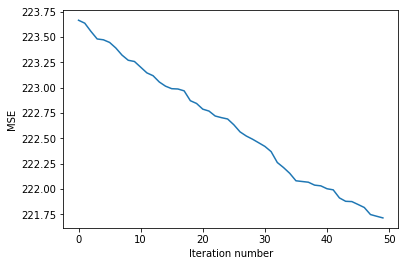

In [20]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

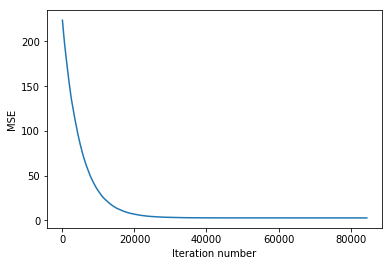

In [21]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [22]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [23]:
stoch_errors_by_iter[-1]

2.7844125884067035

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [24]:
y_pred_gr = np.array([linear_prediction(X[i,::],stoch_grad_desc_weights) for i in range(X.shape[0])])
y_pred_gr = pd.DataFrame(y_pred_gr)
answer4 = mserror(adver_data['Sales'],y_pred_gr)
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.784412588406704


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**